<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/9.%205Q%20TFIM%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

In [ ]:
from functools import cache

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

In [ ]:
seed_list = [1,   4,   5,   6,   7,   8,  10,  11,  12,  13,
14,  15,  17,  18,  19,  20,  21,  23,  24,  25,
27,  28,  29,  30,  31,  34,  36,  38,  39,  40,
41,  42,  43,  45,  46,  47,  48,  49,  51,  52,
55,  59,  61,  63,  65,  66,  67,  68,  70,  71,
74,  75,  76,  77,  78,  81,  86,  87,  90,  93,
95,  96,  97,  101, 102, 103, 104, 105, 106, 107,
112, 113, 114, 116, 118, 121, 124, 126, 127, 128,
132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
144, 147, 148, 149, 150, 151, 152, 154, 155, 162,
165, 166, 169, 171, 172, 174]

# Hamiltonian Diagonalization

$$ H = Σ Z_j Z_{j+1} - Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.155367074350501

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.026674183332294

# NN in Noiseless Simulator


1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize

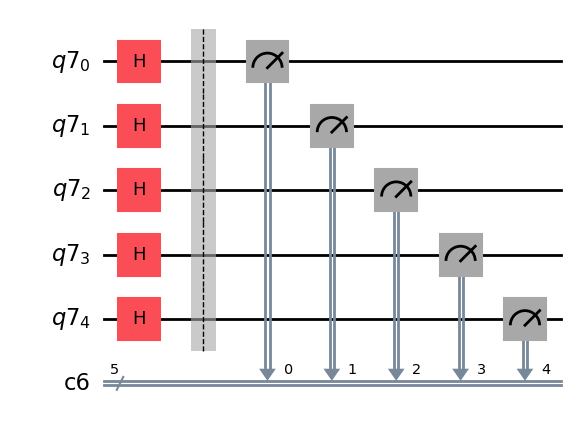

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

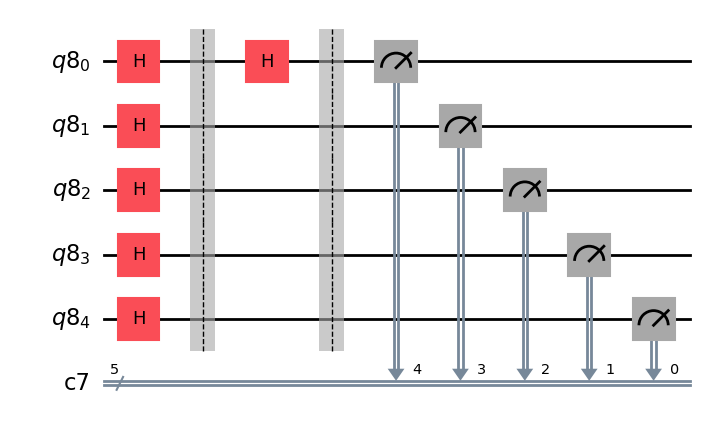

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

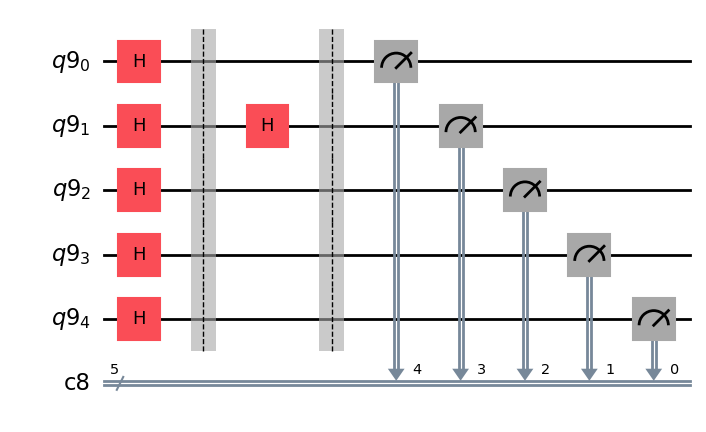

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

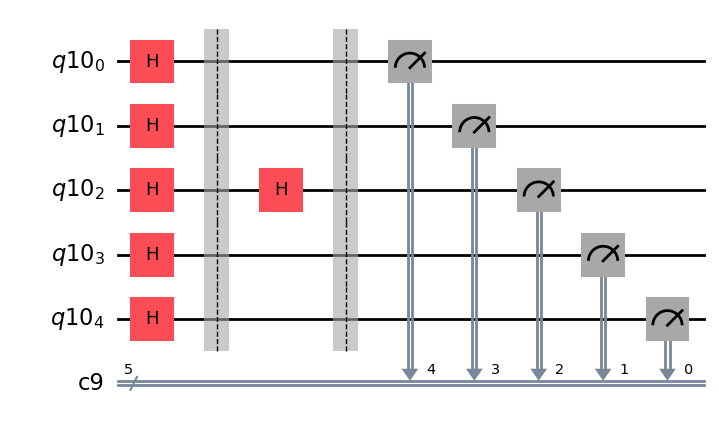

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

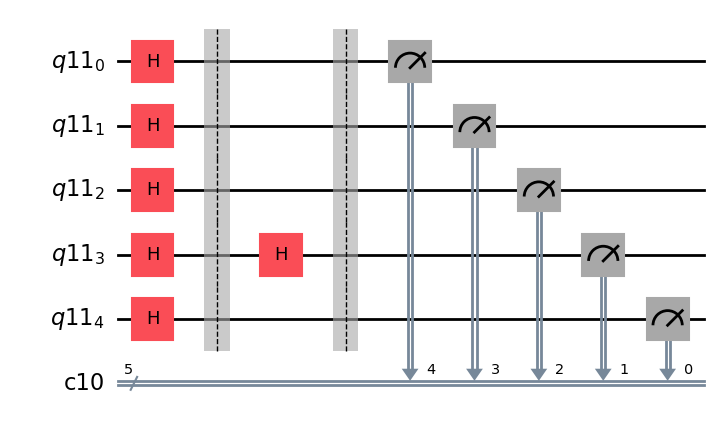

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

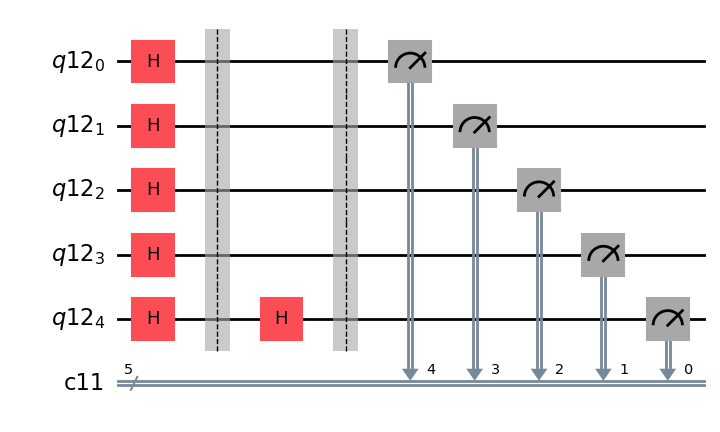

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
# Estimator & Sampler

estimator = Estimator()
sampler = Sampler()

## Cost Function for VQNHE

In [ ]:
prob_string_zz = {0: 0.03125, 1: 0.03125, 2: 0.03125, 3: 0.03125, 4: 0.03125, 5: 0.03125, 6: 0.03125, 7: 0.03125, 8: 0.03125, 9: 0.03125, 10: 0.03125, 11: 0.03125, 12: 0.03125, 13: 0.03125, 14: 0.03125, 15: 0.03125, 16: 0.03125, 17: 0.03125, 18: 0.03125, 19: 0.03125, 20: 0.03125, 21: 0.03125, 22: 0.03125, 23: 0.03125, 24: 0.03125, 25: 0.03125, 26: 0.03125, 27: 0.03125, 28: 0.03125, 29: 0.03125, 30: 0.03125, 31: 0.03125}
prob_string_x0 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.0625, 6: 0.0625, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x1 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.0625, 6: 0.0625, 7: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.0625, 21: 0.0625, 22: 0.0625, 23: 0.0625, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x2 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 24: 0.0625, 25: 0.0625, 26: 0.0625, 27: 0.0625, 4: 0, 5: 0, 6: 0, 7: 0, 12: 0, 13: 0, 14: 0, 15: 0, 20: 0, 21: 0, 22: 0, 23: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x3 = {0: 0.0625, 1: 0.0625, 4: 0.0625, 5: 0.0625, 8: 0.0625, 9: 0.0625, 12: 0.0625, 13: 0.0625, 16: 0.0625, 17: 0.0625, 20: 0.0625, 21: 0.0625, 24: 0.0625, 25: 0.0625, 28: 0.0625, 29: 0.0625, 2: 0, 3: 0, 6: 0, 7: 0, 10: 0, 11: 0, 14: 0, 15: 0, 18: 0, 19: 0, 22: 0, 23: 0, 26: 0, 27: 0, 30: 0, 31: 0}
prob_string_x4 = {0: 0.0625, 2: 0.0625, 4: 0.0625, 6: 0.0625, 8: 0.0625, 10: 0.0625, 12: 0.0625, 14: 0.0625, 16: 0.0625, 18: 0.0625, 20: 0.0625, 22: 0.0625, 24: 0.0625, 26: 0.0625, 28: 0.0625, 30: 0.0625, 1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0, 13: 0, 15: 0, 17: 0, 19: 0, 21: 0, 23: 0, 25: 0, 27: 0, 29: 0, 31: 0}

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 10 times

np.random.seed(k)

k 0~100

In [ ]:
local_minimum_list = []

for k in range(10):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([-6.39460622e-01, -9.61049517e-01, -3.44339135e-01, -1.82542009e-01,
       -4.69011457e-01, -4.35652353e-01, -8.01625035e-02, -1.47581304e-01,
        7.81651244e-01,  7.72153254e-01,  5.81877989e-01, -1.90542966e+00,
        1.33083070e+00,  1.01419829e-01, -4.42492658e-01,  3.53054798e-01,
       -9.59032774e-01, -7.66525462e-01, -5.01730326e-01, -6.84175387e-01,
       -6.08245411e-02,  6.61688334e-01, -2.45080155e-02, -7.97063714e-01,
       -9.22568555e-01, -8.32093713e-01, -4.15146201e-01,  3.09734372e-01,
       -8.88652641e-01, -1.89271086e-01, -4.62710471e-01,  8.08237257e-01,
        2.43848089e-01,  2.15808499e-01, -5.51193529e-01,  3.50405297e-01,
        1.30095768e+00, -4.42047635e-01, -8.01557057e-01,  1.20224764e+00,
       -8.72627138e-01, -2.70768714e-01, -8.59954395e-01, -3.61264586e-01,
       -8.59234810e-01, -2.27578343e-01,  1.02157423e-01,  1.06782224e+00,
        1.98235220e-01, -1.30121773e-02,  2.32036770e-01, -9.89904742e-02,
       -1.07222359e+00, -1.13816697e-01,  4.85603794e-01, -8.01152920e-01,
       -3.54510957e-01,  6.95447285e-01, -4.00095981e-01,  6.51060665e-01,
        5.06932396e-01,  8.14243112e-01, -2.43924231e-01, -2.64644336e-01,
        6.82391136e-01,  4.50670366e-01,  2.07058331e-01,  4.70551571e-01,
        2.84429717e-01,  8.50043064e-01, -4.08719872e-01,  3.79627747e-01,
        1.17438400e+00, -2.98493824e-01,  2.49188893e-02, -2.01159591e-01,
       -3.39767422e-01, -8.39056242e-01, -9.61313275e-01,  1.84313790e-01,
       -1.02182795e-01,  3.15277649e-01,  4.72268301e-01, -1.58147649e-01,
       -3.01364430e-01, -6.23169550e-01,  6.23607573e-01,  6.29746369e-01,
        4.68425975e-01,  7.50369650e-01,  3.76948665e-01, -1.42262230e-01,
       -9.33810640e-01,  5.22035772e-01, -5.25264052e-01, -3.12419973e-01,
       -1.85514432e-01,  2.87569898e-01,  3.17384703e-01,  5.33675795e-01,
       -3.71368953e-01, -6.67174804e-01,  6.43120828e-01, -3.95005237e-01,
       -2.01823318e-01, -8.11402264e-01, -6.67454914e-01, -6.68765489e-01,
       -3.12573386e-01, -2.24313953e-02,  9.46259198e-01,  2.29892767e-01,
       -2.34919179e-01,  2.96668668e-01,  1.76853571e-01,  6.78745531e-01,
       -1.58728217e-01,  8.99571326e-01, -1.68992662e-01, -4.33820514e-01,
       -2.48004619e-02,  8.04415649e-01,  4.61759254e-01, -1.88029557e-02,
       -6.51833345e-02,  3.99367266e-01, -1.91288029e-03,  2.79604319e-01,
        9.42350407e-01,  8.25206814e-01,  6.80561681e-01, -7.57983505e-01,
        1.74827229e-01, -2.68910480e-01,  8.07125234e-01, -3.63347064e-01,
        7.12696226e-01, -7.34541347e-01, -1.59218450e-01,  9.26895100e-01,
        2.25693269e-01,  7.54843871e-01, -9.04674321e-02, -5.63339218e-01,
        4.99968307e-01, -2.01485352e-01, -3.01245675e-01, -1.02177800e+00,
       -7.10161076e-01,  1.15368001e+00,  8.28477955e-01,  7.64913532e-01,
       -3.86225205e-01, -8.98823136e-01,  2.21119867e-01,  5.61932652e-01,
        1.12502908e+00, -8.37215110e-01, -5.34234335e-01, -4.46185897e-03,
       -8.09358583e-01,  6.89300901e-01,  6.59639436e-01, -5.13348447e-01,
       -8.05151098e-01,  8.32565860e-01,  4.97918769e-01, -3.67135583e-01,
       -4.34867195e-02,  8.13233408e-01, -2.76295109e-01, -8.57754078e-01,
        3.89654263e-01, -3.74910481e-01,  3.73169480e-01,  7.88981723e-01,
       -5.59442842e-01, -7.21675349e-01, -8.94096264e-01,  2.96717353e-01,
       -8.38454487e-01,  9.16746888e-01,  4.13893745e-01,  8.11201028e-01,
        6.01129875e-01, -6.12015630e-01, -6.68323692e-01,  9.20070380e-01,
       -4.17924048e-01,  5.67029123e-01, -6.58419704e-01, -1.54022813e-01,
        4.06887809e-01, -5.72715201e-01,  2.95387774e-01,  8.10098921e-01,
       -3.99472142e-01, -6.67432947e-01, -9.44534678e-01, -3.34505803e-01,
       -7.77983883e-01,  1.40930791e-01,  2.34294858e-01,  1.60503194e-01,
        3.38701628e-01,  6.26870945e-02,  7.61063404e-01,  2.53270324e-01,
        7.22785375e-01, -1.16460617e-01, -7.18748229e-01, -6.87994576e-01,
        4.44425542e-01, -5.37891005e-01,  5.88378478e-01,  7.60107790e-01,
        1.01549738e-01, -6.95007577e-01,  2.46993207e-01, -2.76430942e-01,
        8.16895886e-01, -5.74588868e-01, -5.29349472e-01, -3.58613347e-02,
       -1.73821440e-02, -6.24141837e-01, -2.67566824e-01,  3.22337858e-01,
       -5.89599016e-02, -8.87241609e-01, -1.61901062e-01, -4.35465718e-01,
       -3.76278731e-03, -9.89508899e-01, -5.26528384e-01,  1.02733642e+00,
        7.97576230e-01,  9.89823606e-01,  5.17780207e-01,  4.37282833e-02,
        8.75008369e-01, -7.10376976e-01, -4.63965755e-01,  2.56682606e-01,
        1.21318412e-01, -4.64365974e-01, -2.76108570e-01, -5.29278450e-02,
       -4.31956826e-01, -6.06307279e-01, -4.06286188e-01, -9.93935691e-02,
        6.07676075e-01,  2.19619394e-01, -8.49006646e-01,  2.83814178e-02,
       -3.17317005e-01,  5.11458011e-01, -2.68597594e-01, -9.61217668e-01,
        1.06512624e+00, -2.44706184e-01, -3.25374619e-01, -6.27343350e-02,
        7.53709319e-01, -3.58187704e-01, -2.61370472e-01, -2.84238557e-01,
        9.28713874e-01, -8.08741993e-01,  2.07290741e+00])

## Plot Result of VQNHE in Noiseless Simulator

Neural Net Lowest Energy Configurations for 10 times

[-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418]

VQfixedNHE Lowest Energy Configuration

[-6.026673976585643]

VQNHE Lowest Energy Configuration for 100 times

[-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
nn_minimum_list = np.array([-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418])

In [ ]:
vqfixednhe_minimum = np.array([-6.026673976585643])

In [ ]:
vqnhe_minimum_list = np.array([-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634])

In [ ]:
vqe_minimum_list = np.array([-5.606, -5.71875, -5.60175, -5.698, -5.78125, -5.767, -5.5845, -5.645, -5.69425, -5.51475, -5.56775, -5.75575, -5.769, -5.57125, -5.64275, -5.74275, -5.5175, -5.7255, -5.666, -5.73625, -5.723, -5.7545, -5.6705, -5.60075, -5.52975, -5.6935, -5.61425, -5.6985, -5.69325, -5.6845, -5.73225, -5.72175, -5.6815, -5.31325, -5.7015, -5.70625, -5.68925, -5.738, -5.71325, -5.672, -5.66375, -5.618, -5.6725, -5.6015, -5.615, -5.7535, -5.52925, -5.767, -5.736, -5.7325, -5.647, -5.6445, -5.72275, -5.55, -5.67225, -5.68075, -5.7195, -5.6425, -5.7215, -5.60475, -5.72025, -5.709, -5.58275, -5.7115, -5.7125, -5.6935, -5.6955, -5.53825, -5.53225, -5.52125, -5.64025, -5.644, -5.7355, -5.6575, -5.6785, -5.56625, -5.762, -5.6985, -5.697, -5.63975, -5.61525, -5.68075, -5.76425, -5.7605, -5.699, -5.57325, -5.707, -5.57125, -5.74275, -5.68675, -5.4285, -5.7675, -5.76325, -5.6595, -5.71025, -5.66375, -5.6435, -5.726, -5.67075, -5.62425])

In [ ]:
print(vqfixednhe_minimum)

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# NN in Noisy Simulator (Bit Flip Channel, 0.01)

1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

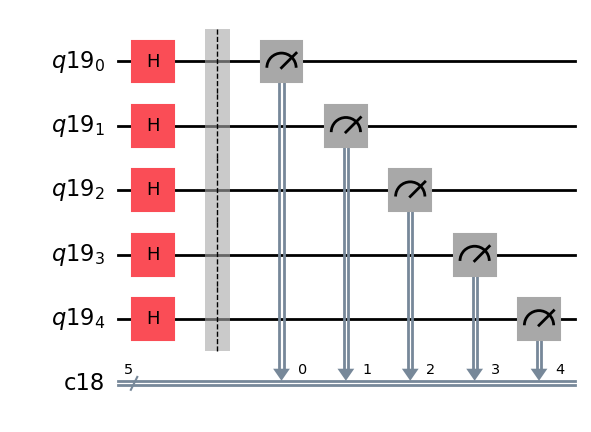

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

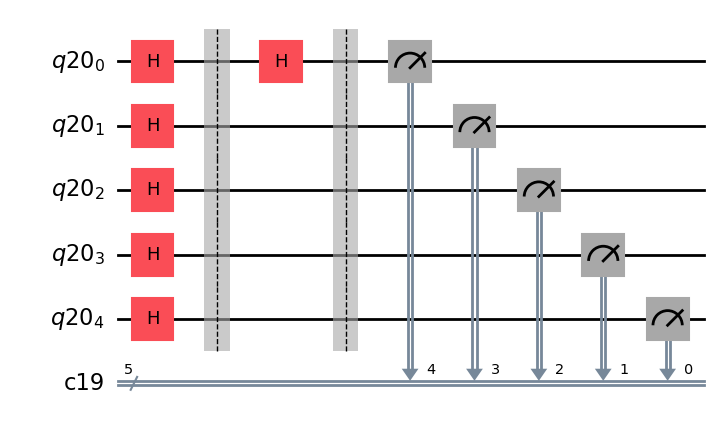

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

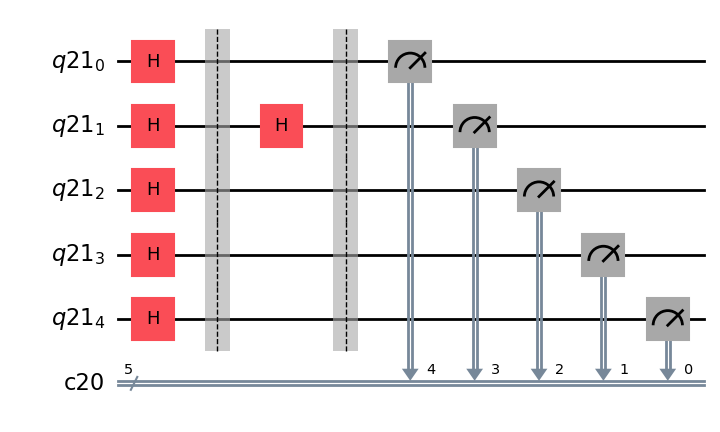

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

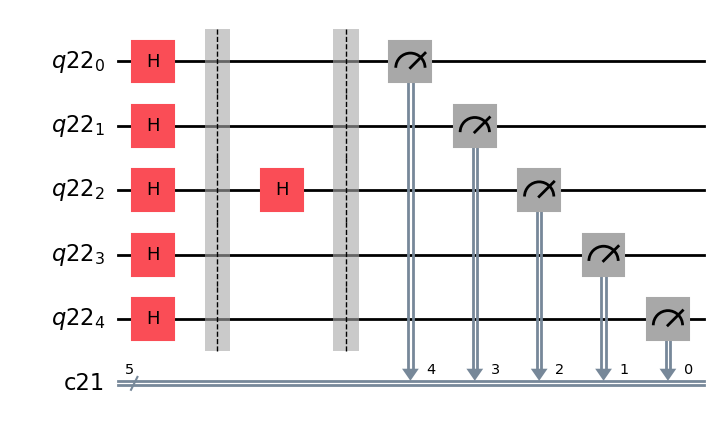

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

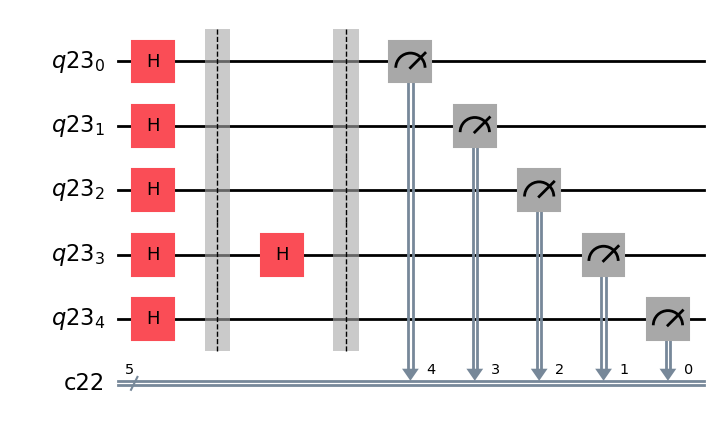

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

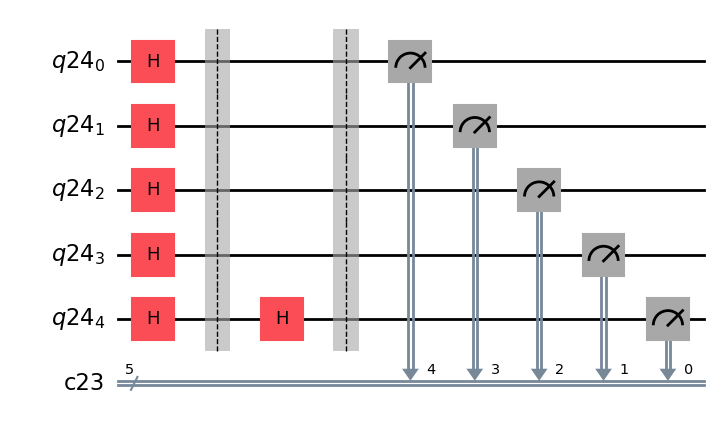

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_bit = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)

## Cost Function for NN

In [ ]:
prob_string_zz = {18: 0.032875, 10: 0.02875, 26: 0.03225, 17: 0.030625, 9: 0.031875, 5: 0.032375, 31: 0.033, 27: 0.032375, 16: 0.036375, 7: 0.03075, 3: 0.030125, 21: 0.032, 28: 0.029875, 11: 0.032, 1: 0.03075, 6: 0.02875, 2: 0.03325, 15: 0.03675, 22: 0.029625, 13: 0.032375, 8: 0.03125, 12: 0.026875, 24: 0.0295, 29: 0.03075, 19: 0.029875, 23: 0.028875, 20: 0.03125, 4: 0.030375, 30: 0.032, 14: 0.0335, 0: 0.028, 25: 0.031}
prob_string_x0 = {15: 0.065, 4: 0.06275, 1: 0.067, 13: 0.0585, 6: 0.05925, 8: 0.063375, 12: 0.0595, 2: 0.063125, 0: 0.05875, 10: 0.06075, 14: 0.07025, 9: 0.06275, 5: 0.06325, 11: 0.064625, 3: 0.0605, 7: 0.060625, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x1 = {4: 0.06275, 22: 0.07025, 6: 0.05925, 20: 0.0595, 3: 0.0605, 7: 0.060625, 16: 0.063375, 2: 0.063125, 0: 0.05875, 23: 0.065, 1: 0.067, 21: 0.0585, 18: 0.06075, 19: 0.064625, 17: 0.06275, 5: 0.06325, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x2 = {8: 0.06275, 10: 0.05925, 25: 0.0585, 27: 0.065, 16: 0.063375, 2: 0.063125, 0: 0.05875, 1: 0.067, 18: 0.06075, 19: 0.064625, 17: 0.06275, 26: 0.07025, 9: 0.06325, 24: 0.0595, 3: 0.0605, 11: 0.060625, 4: 0, 5: 0, 6: 0, 7: 0, 12: 0, 13: 0, 14: 0, 15: 0, 20: 0, 21: 0, 22: 0, 23: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x3 = {29: 0.065, 8: 0.06275, 12: 0.05925, 25: 0.0585, 16: 0.063375, 4: 0.063125, 20: 0.06075, 1: 0.067, 28: 0.07025, 21: 0.064625, 0: 0.05875, 24: 0.0595, 17: 0.06275, 9: 0.06325, 5: 0.0605, 13: 0.060625, 2: 0, 3: 0, 6: 0, 7: 0, 10: 0, 11: 0, 14: 0, 15: 0, 18: 0, 19: 0, 22: 0, 23: 0, 26: 0, 27: 0, 30: 0, 31: 0}
prob_string_x4 = {30: 0.065, 2: 0.067, 0: 0.05875, 12: 0.05925, 26: 0.0585, 16: 0.063375, 4: 0.063125, 20: 0.06075, 18: 0.06275, 28: 0.07025, 22: 0.064625, 10: 0.06325, 24: 0.0595, 8: 0.06275, 6: 0.0605, 14: 0.060625, 1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0, 13: 0, 15: 0, 17: 0, 19: 0, 21: 0, 23: 0, 25: 0, 27: 0, 29: 0, 31: 0}

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 10 times

np.random.seed(k)

k 0~10

In [ ]:
local_minimum_list = []

for k in range(10):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([-9.22180949e-02,  9.56885647e-01,  6.88698189e-01, -9.60894992e-01,
       -5.16257191e-01,  1.12880484e+00, -4.90604068e-02, -4.79754918e-01,
       -5.70896439e-01, -7.43752046e-01,  3.81646315e-01, -2.66619155e-02,
       -5.26172704e-01, -9.88075450e-01, -1.54335683e-01, -8.64186812e-01,
        9.06271758e-01, -3.16026531e-01,  8.83174900e-01, -1.65482234e-02,
        1.84332356e-02, -1.05145855e+00, -3.17342457e-01, -4.59622683e-02,
        3.30221379e-01, -3.49445594e-01,  4.65678248e-01,  3.20867814e-01,
       -6.28029474e-01, -3.18359520e-01,  6.15487808e-01, -1.20731615e+00,
        6.42106145e-01, -8.02666873e-01,  1.44691071e-01,  5.45375755e-01,
       -3.95310145e-01,  9.19024433e-01, -7.47347185e-02, -4.73706739e-01,
       -2.51195675e-01,  5.50422543e-01, -4.49306421e-01, -8.96762892e-01,
       -4.20794800e-01,  9.80758031e-01, -1.38174234e-01, -7.10808070e-01,
        1.18253111e+00, -3.33889735e-01, -6.15897139e-01, -6.64048982e-01,
       -7.28739724e-01, -6.03160498e-01,  1.01867536e+00, -5.06708336e-01,
       -4.89016302e-01, -1.36992317e-02, -8.77563696e-02,  5.57113916e-01,
        3.03116591e-01,  4.63142638e-01, -6.94176387e-01, -4.15332416e-01,
       -7.59305513e-01, -4.87878088e-01, -2.22836223e-01, -1.23182991e-02,
        7.14205287e-01, -8.83398592e-01, -4.69467370e-01, -9.29811275e-01,
        6.91020972e-02,  1.11613177e-01,  3.02827819e-01, -5.79208535e-01,
        1.98860635e-01, -7.62260829e-02, -8.36139520e-01,  2.27807426e-01,
       -5.42964875e-01, -9.27447736e-01,  9.31873136e-01, -8.58550512e-01,
        4.46932030e-01,  5.25984722e-03, -8.11053406e-01,  4.78987087e-02,
       -1.31564077e-01, -1.25255134e-02,  9.47669310e-01,  1.10986286e+00,
        1.39217618e-01, -3.41810275e-02,  8.19447117e-02,  4.70351225e-01,
        8.86800508e-02, -9.76291970e-01,  2.57896379e-01,  8.20610761e-01,
       -4.72047681e-01, -2.58840891e-01, -8.18213423e-01,  6.10153049e-02,
       -5.35198665e-01, -6.67454705e-01, -6.34982081e-01, -4.83067050e-01,
       -1.01733008e+00,  2.24069423e-01,  7.17911739e-01,  6.16526338e-01,
       -3.02654741e-01, -6.58391088e-01,  4.65362242e-01,  3.50612202e-01,
        1.64656953e-01,  1.55752889e-01,  8.23942591e-01,  1.06504076e+00,
       -8.31181561e-01, -4.80914918e-01,  6.54741124e-01, -1.54354339e-01,
       -2.47350243e-01, -3.06137265e-01, -3.87037467e-01,  5.95402835e-01,
       -7.33831897e-01,  1.07417483e+00, -4.10711894e-01, -1.25443266e-01,
       -6.33086693e-01, -4.88599227e-01,  9.13924960e-01, -5.11008820e-02,
       -7.01271776e-01,  1.23035910e-03,  2.39934649e-01,  7.51526846e-01,
       -4.09601008e-01,  9.75551234e-01, -4.91640117e-01, -4.18717604e-01,
       -2.20061126e-01, -4.61178717e-01,  2.43245804e-01, -6.54922182e-01,
       -8.81621146e-02, -1.59459827e-01,  4.38921044e-01, -4.62907292e-01,
       -7.41747631e-01, -1.09264849e+00,  9.75015218e-01, -5.77892681e-02,
        4.02304891e-01,  8.70924868e-01, -5.14963856e-02,  3.63069387e-01,
        2.67469380e-01,  8.56785446e-01,  5.99962463e-01, -9.14557184e-02,
       -1.08622565e-01, -5.43918737e-01,  1.43063927e-01, -9.03393154e-01,
        1.20041032e-01, -8.34833766e-01, -5.38048246e-02,  8.20040185e-02,
        5.19980784e-01, -3.19074819e-01,  2.31399123e-01,  7.93074115e-02,
       -4.84724980e-01, -3.75988747e-01, -1.36844345e-01, -3.21713575e-01,
        1.30758822e-02, -1.32368049e-01,  5.55381098e-01, -2.05028630e-01,
       -2.30709494e-01,  9.59364971e-01, -1.44511555e+00, -6.65969972e-01,
        1.96598417e-02, -3.47792229e-01,  1.25951418e-01,  3.58432995e-01,
       -1.79912239e-01, -5.67448137e-01, -7.06266508e-01, -4.90590250e-01,
       -2.08168009e-01, -8.63035297e-01,  5.93401268e-01, -8.73833384e-01,
       -9.25408911e-01, -6.01411438e-01, -5.55439529e-01, -4.70688097e-01,
       -9.70981010e-01, -2.29512968e-01,  3.65430606e-01, -8.03301433e-01,
        3.88788201e-01, -8.16259742e-01,  9.43835090e-01, -3.24557772e-02,
        1.82019099e-01, -1.69821113e-01,  4.80533001e-01, -3.55982320e-01,
       -4.43132716e-01, -7.32656893e-01,  6.14692427e-01, -7.15502702e-01,
       -8.08372249e-01,  3.52333729e-01,  8.98695242e-01, -8.02786590e-01,
       -4.28980146e-01, -7.39631119e-01, -2.81784463e-01, -8.87080486e-02,
        6.59658969e-01, -3.12894721e-01,  5.46293604e-01, -1.41913759e-01,
       -5.78694042e-02, -1.68501784e-02, -5.30647389e-01, -4.03222415e-01,
        1.08702860e+00, -7.37198015e-01,  2.32178769e-01, -7.09824417e-01,
        2.45352759e-04, -8.84002406e-01, -9.38165250e-01, -4.04995087e-01,
       -1.64400926e-01,  3.61014677e-01, -1.51523761e-01,  7.02847841e-01,
       -1.29521502e-01,  6.17379612e-01, -2.00426707e-01,  9.68866895e-01,
        4.37013555e-01, -6.06940034e-01, -4.88437938e-01, -1.66566116e-01,
        5.54790155e-01, -6.12397627e-01,  5.10995192e-01,  7.46487106e-01,
       -7.26298665e-01, -2.63988418e-01,  8.97411010e-01,  7.25906575e-01,
        8.87636443e-01,  9.19887419e-01, -2.83598814e-01,  2.54789060e-01,
       -2.45922503e-01,  4.92943123e-01, -3.10910237e+00])

## Plot Result of VQNHE in Noisy Simulator (Bit Flip Channel, 0.01)

Neural Net Lowest Energy Configurations for 10 times

[-6.026677749855398,
 -6.026677749976061,
 -6.026677748494037,
 -6.024063072414603,
 -6.026677749556434,
 -6.008426000579483,
 -6.026677749815028,
 -6.026677750075579,
 -6.026677750116603,
 -6.026677750117541]

VQfixedNHE Lowest Energy Configuration

[-5.841139243087609]

VQNHE Lowest Energy Configuration for 100 times

[-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
nn_minimum_list = np.array([-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418])

In [ ]:
vqfixednhe_minimum = np.array([-5.841139243087609])

In [ ]:
vqnhe_minimum_list = np.array([-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418])

In [ ]:
vqe_minimum_list = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667,
-5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285,
-5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605,
-5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143,
-5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138,
-5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454,
-5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845,
-5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557,
-5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463,
-5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585,
-5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668,
-5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428,
-5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  ,
-5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653,
-5.89196071, -5.89641764, -5.88954192, -5.89643247])

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
print(vqfixednhe_minimum)

In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# NN in Noisy Simulator (Depolarization Channel, 0.01)

1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

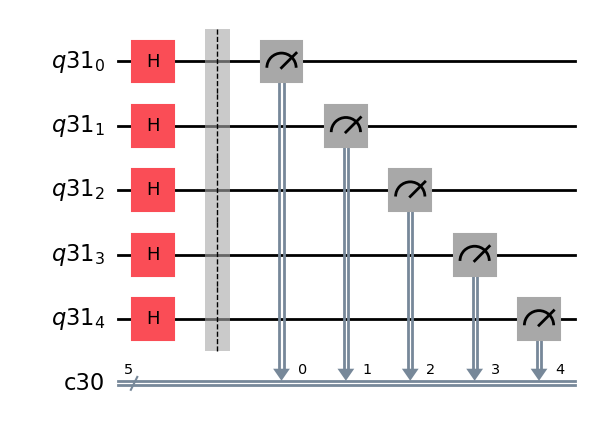

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

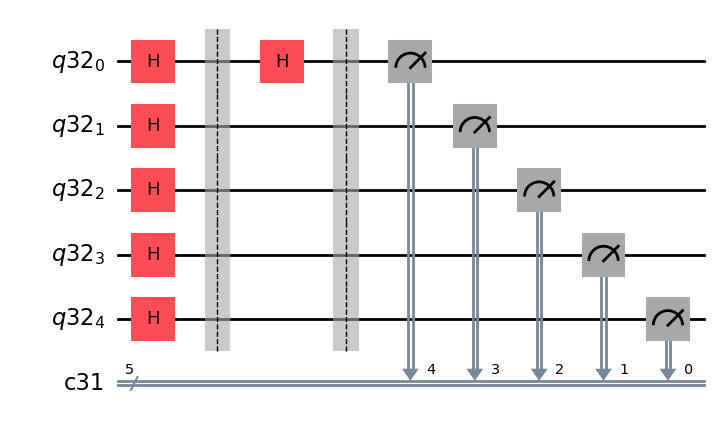

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

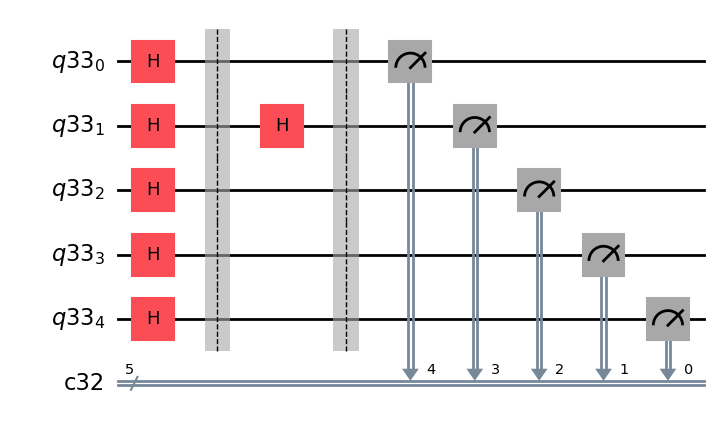

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

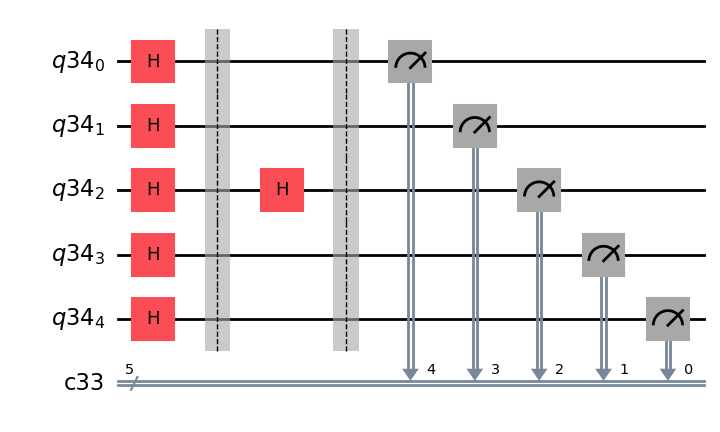

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

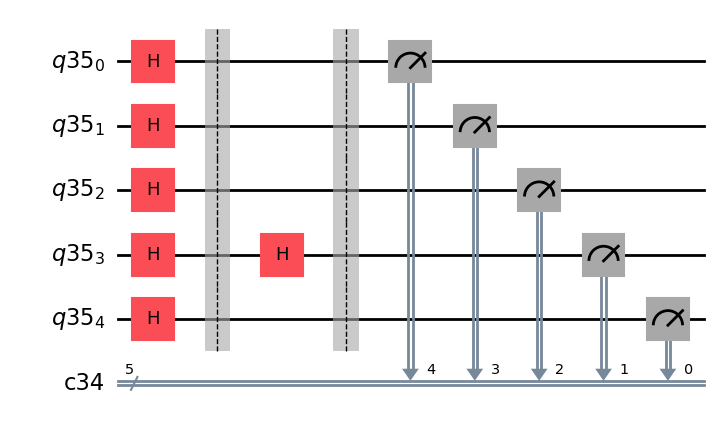

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

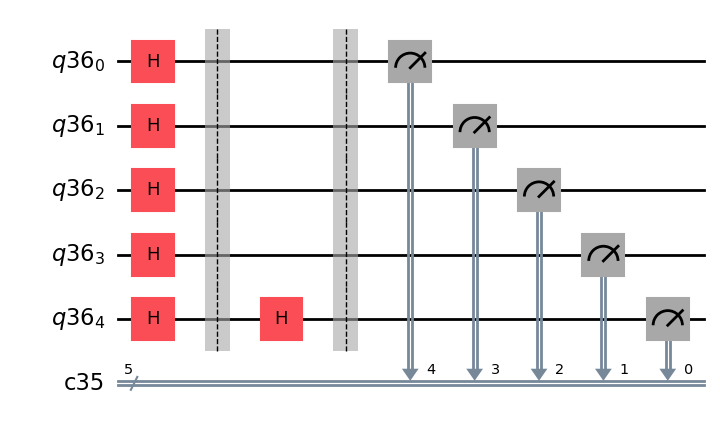

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)

## Cost Function for VQNHE

In [ ]:
prob_string_zz = {18: 0.032875, 10: 0.02875, 26: 0.03225, 17: 0.030625, 9: 0.031875, 5: 0.032375, 31: 0.033, 27: 0.032375, 16: 0.036375, 7: 0.03075, 3: 0.030125, 21: 0.032, 28: 0.029875, 11: 0.032, 1: 0.03075, 6: 0.02875, 2: 0.03325, 15: 0.03675, 22: 0.029625, 13: 0.032375, 8: 0.03125, 12: 0.026875, 24: 0.0295, 29: 0.03075, 19: 0.029875, 23: 0.028875, 20: 0.03125, 4: 0.030375, 30: 0.032, 14: 0.0335, 0: 0.028, 25: 0.031}
prob_string_x0 = {15: 0.065, 4: 0.06275, 1: 0.067, 13: 0.0585, 6: 0.05925, 8: 0.063375, 12: 0.0595, 2: 0.063125, 0: 0.05875, 10: 0.06075, 14: 0.07025, 9: 0.06275, 5: 0.06325, 11: 0.064625, 3: 0.0605, 7: 0.060625, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x1 = {4: 0.06275, 22: 0.07025, 6: 0.05925, 20: 0.0595, 3: 0.0605, 7: 0.060625, 16: 0.063375, 2: 0.063125, 0: 0.05875, 23: 0.065, 1: 0.067, 21: 0.0585, 18: 0.06075, 19: 0.064625, 17: 0.06275, 5: 0.06325, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x2 = {8: 0.06275, 10: 0.05925, 25: 0.0585, 27: 0.065, 16: 0.063375, 2: 0.063125, 0: 0.05875, 1: 0.067, 18: 0.06075, 19: 0.064625, 17: 0.06275, 26: 0.07025, 9: 0.06325, 24: 0.0595, 3: 0.0605, 11: 0.060625, 4: 0, 5: 0, 6: 0, 7: 0, 12: 0, 13: 0, 14: 0, 15: 0, 20: 0, 21: 0, 22: 0, 23: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x3 = {29: 0.065, 8: 0.06275, 12: 0.05925, 25: 0.0585, 16: 0.063375, 4: 0.063125, 20: 0.06075, 1: 0.067, 28: 0.07025, 21: 0.064625, 0: 0.05875, 24: 0.0595, 17: 0.06275, 9: 0.06325, 5: 0.0605, 13: 0.060625, 2: 0, 3: 0, 6: 0, 7: 0, 10: 0, 11: 0, 14: 0, 15: 0, 18: 0, 19: 0, 22: 0, 23: 0, 26: 0, 27: 0, 30: 0, 31: 0}
prob_string_x4 = {30: 0.065, 2: 0.067, 0: 0.05875, 12: 0.05925, 26: 0.0585, 16: 0.063375, 4: 0.063125, 20: 0.06075, 18: 0.06275, 28: 0.07025, 22: 0.064625, 10: 0.06325, 24: 0.0595, 8: 0.06275, 6: 0.0605, 14: 0.060625, 1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0, 13: 0, 15: 0, 17: 0, 19: 0, 21: 0, 23: 0, 25: 0, 27: 0, 29: 0, 31: 0}

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 10 times

np.random.seed(k)

k 0~10

In [ ]:
local_minimum_list = []

for k in range(15):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([ 0.44855611, -0.75890078,  0.10780264,  0.80945932, -0.08550565,
       -0.32392527, -0.6578295 ,  0.64794882, -0.66177833, -0.82332037,
        0.49890282,  1.18849393, -1.1529314 , -0.26321966,  0.59057445,
        0.50182816,  0.45259964, -0.5938356 ,  1.05485963, -0.09867208,
        0.4459861 , -0.7321852 ,  0.03100863,  0.28597402, -0.2501669 ,
       -0.11405975,  0.20824048,  0.06131092, -0.29529734,  0.42546156,
        0.17723267,  0.09052077,  1.0195445 , -0.67455141, -0.73516063,
       -0.31420417, -0.93285587,  0.47636501, -0.91077941,  0.3733171 ,
       -0.12298936,  0.23273768, -1.12616776,  0.87281213, -0.6001478 ,
        0.43518111, -0.24844476,  1.07755124, -0.34822435, -0.33200857,
       -0.23324713, -0.81848441,  0.59164094, -0.8414328 , -0.24123345,
        0.86154122,  0.82887775, -0.01499076,  0.62623094, -0.56882298,
        0.23100156,  0.86943054,  0.11150132,  0.21855232, -1.0128773 ,
       -0.32192472, -0.90902885, -0.43085527, -0.14962373,  0.4397629 ,
       -0.93070006, -0.2280482 , -0.54796086,  0.49610652, -0.29891461,
       -0.93355448,  0.45606337,  0.49277433,  0.85308394, -0.34862393,
        0.21115513,  0.02693325,  0.19338229, -0.47634375, -0.39825738,
       -0.94938252, -0.39387488, -0.51584825,  0.11421632,  0.13101404,
        0.32992805, -0.46856463, -1.10091028,  0.81422806, -0.19027311,
       -0.18797532,  0.78978617, -0.11850603, -0.55434998,  0.14470877,
        0.15664052,  0.74070601, -0.68950033, -0.19347522,  0.60701607,
        0.28424621,  0.15348443, -1.10287577, -0.31368632,  0.14915425,
       -0.4005875 ,  0.02466831,  0.2690946 , -0.84026541, -0.89904466,
       -0.33193344, -0.78430919, -0.64219438,  0.67568791, -0.27208082,
       -0.6188896 ,  0.50499234, -0.75856439,  0.43985834, -0.07445244,
        0.13797141, -0.70721004, -0.63192362,  0.36066031, -0.90730423,
       -0.33599917, -0.0385608 , -1.01011724, -0.41752991,  0.69947304,
        0.83466865, -0.12959654,  0.11292173, -0.93883396,  0.852418  ,
        0.23987932,  0.58351399,  0.20993137,  0.66027527,  0.19663634,
        0.39137576, -0.72098526, -0.16043874,  0.2837504 , -0.68547572,
       -0.54939942, -0.66791697, -0.03462852,  0.47478518, -0.92327919,
        0.55822618,  0.29116264,  0.19382843, -0.55317833, -0.28100443,
       -0.38014152, -0.92488465, -0.96234216, -0.09112866,  0.48491162,
        0.05470791, -0.23455807, -0.6638544 ,  0.69244508,  0.14330681,
        0.51991958,  0.6939694 ,  0.26174538,  0.57164123,  0.22938716,
       -0.9622608 ,  0.47411758, -0.65462584, -0.05573361, -0.01720971,
       -0.03361561,  0.68037307, -0.62731803, -0.97073025,  0.69712114,
        0.5273171 , -0.09910576, -0.17255226, -0.76654098, -0.32645198,
       -0.80771651,  0.42340914, -0.84582919, -0.58774804,  0.14755246,
       -0.40653348,  0.29850905,  0.62150886, -0.29757299, -0.8226143 ,
        0.26614048,  0.64358462,  0.00291165,  0.7405856 , -0.25702956,
       -0.39946386,  0.81993711,  0.39489789,  0.06980119,  0.26880764,
       -0.64533355,  0.7914179 ,  0.71827332, -0.47555702,  0.70468717,
       -0.57940905, -0.98948333, -0.89989993, -0.54284561, -0.95228748,
       -0.50994645,  0.70200649, -0.17885309, -0.74992541,  0.61978333,
       -0.38985381, -1.21314576,  0.49396586, -0.45141036, -0.02940453,
        0.06778545,  0.48934326,  0.77816177,  0.37280214,  0.16880743,
       -0.45309255, -0.66004155,  0.04676844,  0.08830501,  0.83135715,
       -0.36415261, -0.20711624,  0.57545903, -0.60779529, -0.606471  ,
        0.66706845,  0.05639343, -0.87306544,  0.97255158, -0.37489998,
       -0.12500851, -0.55757425,  0.59817407,  0.25506421,  0.58528208,
       -0.42936399, -0.49144846,  0.2417976 ,  0.67274824,  0.2867868 ,
       -0.38389273, -0.74101921, -0.30204202,  0.95283403,  0.371806  ,
       -0.30179996, -0.85568383,  0.83057125,  0.41893217,  0.64624123,
        2.30752495])

## Plot Result of VQNHE in Noisy Simulator (Depolarization Channel, 0.01)

Neural Net Lowest Energy Configurations for 10 times

[-6.026677749855398,
 -6.026677749976061,
 -6.026677748494037,
 -6.024063072414603,
 -6.026677749556434,
 -6.008426000579483,
 -6.026677749815028,
 -6.026677750075579,
 -6.026677750116603,
 -6.026677750117541]

VQfixedNHE Lowest Energy Configuration

[-5.717442513718117]

VQNHE Lowest Energy Configuration for 100 times

[-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
nn_minimum_list = np.array([-6.026677749855398, -6.026677749976061, -6.026677748494037, -6.024063072414603, -6.026677749556434, -6.008426000579483, -6.026677749815028, -6.026677750075579, -6.026677750116603, -6.026677750117541])

In [ ]:
vqfixednhe_minimum = np.array([-5.717442513718117])

In [ ]:
vqnhe_minimum_list = np.array([-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368])

In [ ]:
vqe_minimum_list = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116, -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 , -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521 , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418 , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247])

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -6.024591107100077
variance : 2.9642210986691072e-05
maximum : -6.008426000579483
minimum : -6.026677750117541

[-6.02667775 -6.02667775 -6.02667775 -6.02406307 -6.02667775 -6.008426
 -6.02667775 -6.02667775 -6.02667775 -6.02667775]


In [ ]:
print(vqfixednhe_minimum)

In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -5.878570821800002
variance : 1.4331701778902295
maximum : 6.02667372
minimum : -6.026674

[-6.02667373 -6.02667373 -6.02667368 -6.02667354 -5.8987224  -5.97700928
 -5.96536259 -6.02667368 -6.02667371 -5.94009695 -6.02667371 -6.02628084
 -6.02667371 -5.89945393 -6.02667371 -5.9583359  -6.02667352 -6.02667373
 -6.02667368 -5.9294343  -5.94016942 -6.0266737  -6.02667358 -6.02667369
 -5.97782861 -6.0266737  -6.02667319 -5.97782869 -5.97782861 -5.97782857
 -6.02667363 -6.02667367 -5.94801533 -5.97500441 -6.02667365 -6.02667369
 -6.02659477 -6.01371031 -5.97701072 -5.89828085 -5.94063178 -5.94017144
 -6.0266737  -5.96536198 -6.02667369 -6.02642066 -6.02262504 -5.98140869
 -6.02609303 -6.02667364 -5.947205   -6.022831   -6.026674   -6.026101
 -5.96977    -6.02586    -6.02667367 -6.02113763 -6.0266737  -6.0266737
 -6.02667366 -6.02667368 -5.97976822 -5.89828149 -6.02158803 -6.02667372
 -6.02034773 -6.02288384 -6.02152311 -6.02667373 -5.98259114 -6.02667355
 -6.02667366 -6.02627895 -6.0

In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# NN in IBM Hardware (IBM CUSCO, resilience_level=0)

1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

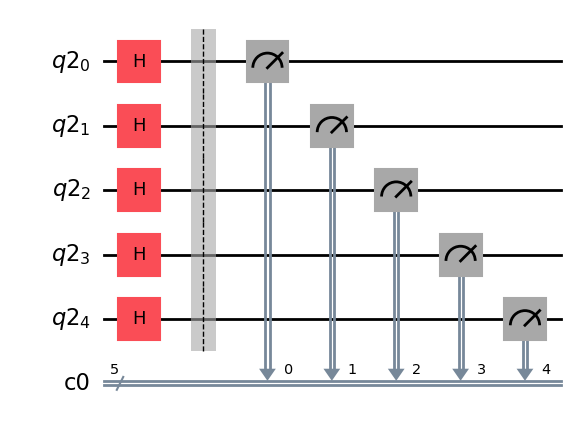

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

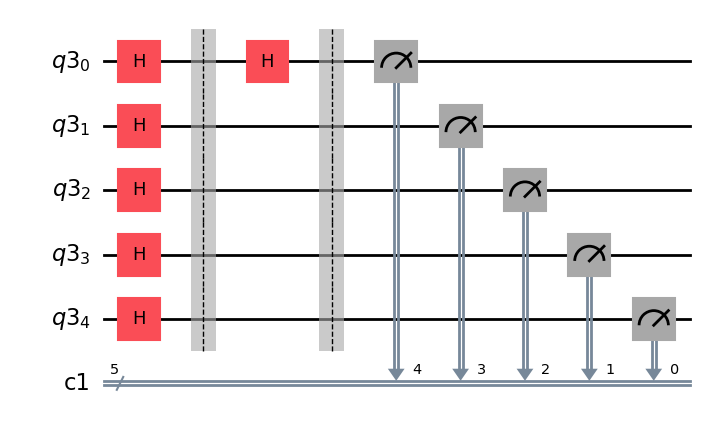

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

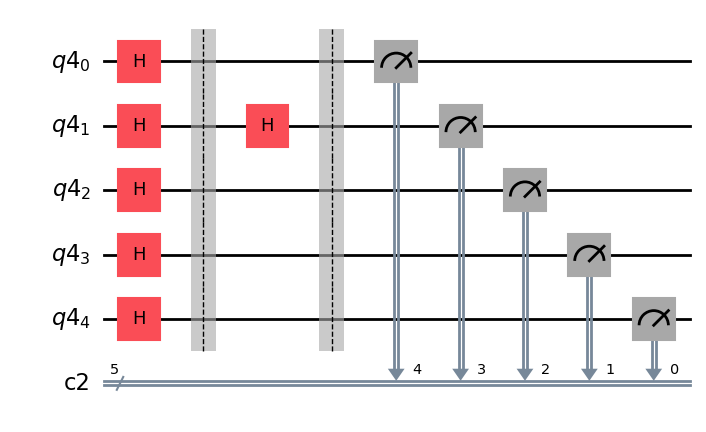

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

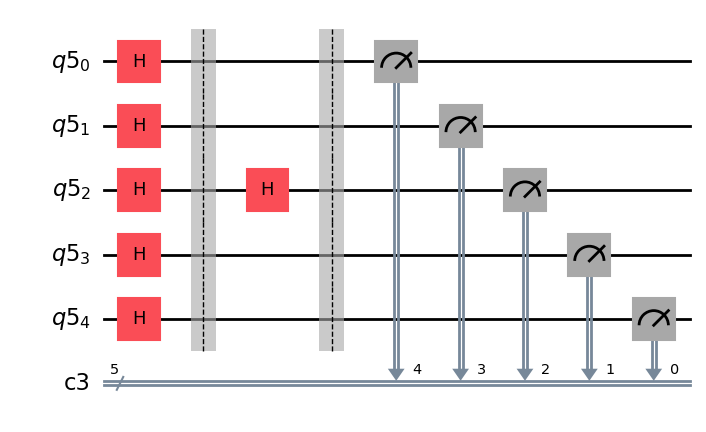

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

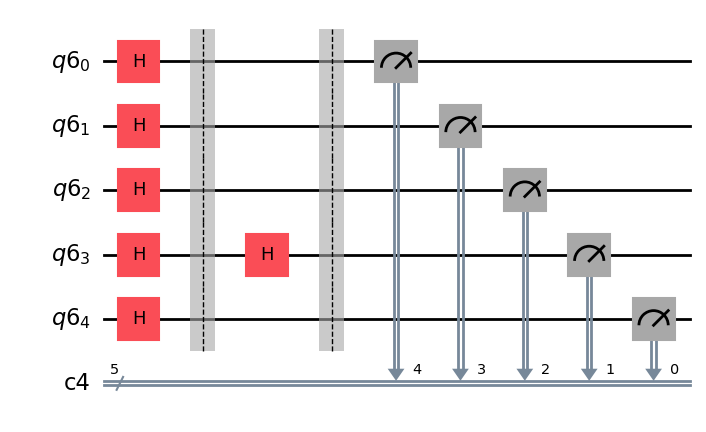

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

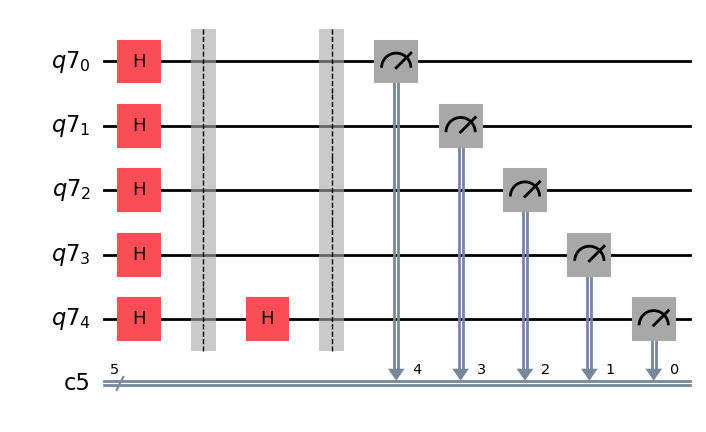

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_cusco")
print(backend)

<IBMBackend('ibm_cusco')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circuit_zz = pm.run(ansatz_zz)
isa_circuit_x0 = pm.run(ansatz_x0)
isa_circuit_x1 = pm.run(ansatz_x1)
isa_circuit_x2 = pm.run(ansatz_x2)
isa_circuit_x3 = pm.run(ansatz_x3)
isa_circuit_x4 = pm.run(ansatz_x4)


options = Options()
options.optimization_level = 3
options.resilience_level = 0

sampler = Sampler(backend=backend, options=options)

## Cost Function for VQNHE

In [ ]:
job = sampler.run(isa_circuit_zz, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{3: 0.02825, 10: 0.02875, 23: 0.031375, 30: 0.030625, 9: 0.0265, 17: 0.032375, 14: 0.03425, 18: 0.02925, 27: 0.03075, 28: 0.035125, 4: 0.03225, 0: 0.032375, 11: 0.0325, 20: 0.033, 31: 0.031625, 19: 0.03525, 16: 0.027875, 5: 0.03, 13: 0.030625, 8: 0.032625, 24: 0.032125, 21: 0.03375, 7: 0.034125, 12: 0.029125, 2: 0.032875, 25: 0.035625, 29: 0.029125, 26: 0.030375, 22: 0.02975, 1: 0.03, 6: 0.028, 15: 0.02975}

In [ ]:
job = sampler.run(isa_circuit_x0, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{5: 0.059875, 31: 0.002375, 9: 0.059, 22: 0.0025, 19: 0.002875, 2: 0.06225, 0: 0.061, 1: 0.06225, 30: 0.00225, 16: 0.00175, 3: 0.062125, 21: 0.002625, 29: 0.002, 26: 0.002375, 27: 0.002125, 20: 0.002625, 7: 0.064375, 10: 0.05925, 15: 0.05625, 25: 0.001375, 18: 0.00175, 14: 0.058875, 23: 0.002125, 13: 0.0625, 8: 0.0595, 12: 0.059, 24: 0.002, 17: 0.001625, 11: 0.06025, 28: 0.00175, 6: 0.0615, 4: 0.057875}

In [ ]:
job = sampler.run(isa_circuit_x1, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{29: 0.00075, 17: 0.0605, 5: 0.06075, 9: 0.000875, 8: 0.000875, 24: 0.000625, 1: 0.066375, 23: 0.062125, 31: 0.00075, 22: 0.06, 16: 0.05975, 20: 0.057125, 3: 0.06675, 7: 0.06525, 21: 0.057875, 26: 0.000625, 27: 0.00025, 4: 0.06425, 12: 0.000375, 15: 0.001125, 6: 0.061375, 18: 0.063625, 11: 0.000625, 10: 0.000375, 14: 0.000375, 28: 0.000625, 25: 0.000625, 13: 0.000125, 2: 0.061, 30: 0.000375, 0: 0.065375, 19: 0.0585}

In [ ]:
job = sampler.run(isa_circuit_x2, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{21: 0.00025, 8: 0.063125, 5: 0.000375, 20: 0.00025, 2: 0.067875, 9: 0.063625, 1: 0.06275, 24: 0.06, 10: 0.066, 13: 0.00025, 27: 0.060375, 26: 0.0625, 6: 0.000375, 18: 0.061375, 14: 0.00025, 16: 0.062125, 7: 0.00025, 28: 0.000125, 22: 0.000125, 19: 0.058375, 3: 0.05975, 4: 0.000125, 31: 0.0005, 0: 0.066625, 11: 0.061625, 17: 0.0625, 30: 0.00025, 12: 0.000375, 25: 0.057875, 15: 0, 23: 0, 29: 0}

In [ ]:
job = sampler.run(isa_circuit_x3, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{8: 0.064875, 13: 0.05775, 18: 0.0035, 27: 0.00475, 15: 0.002625, 4: 0.05875, 17: 0.062875, 1: 0.061875, 16: 0.056375, 31: 0.004875, 3: 0.00425, 30: 0.005, 23: 0.003375, 28: 0.056, 2: 0.003, 19: 0.003625, 7: 0.004875, 9: 0.06325, 5: 0.0625, 22: 0.005625, 0: 0.053375, 12: 0.058875, 26: 0.003125, 10: 0.00425, 29: 0.051625, 6: 0.0045, 21: 0.051125, 11: 0.003625, 24: 0.0615, 20: 0.057, 25: 0.056125, 14: 0.005125}

In [ ]:
job = sampler.run(isa_circuit_x4, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{9: 0.001125, 16: 0.062125, 29: 0.0005, 2: 0.06125, 4: 0.057375, 22: 0.0605, 25: 0.00125, 17: 0.00075, 0: 0.06575, 11: 0.000875, 3: 0.00175, 7: 0.0005, 10: 0.060625, 24: 0.064125, 19: 0.001125, 21: 0.001125, 14: 0.060375, 18: 0.06575, 30: 0.057875, 13: 0.00125, 6: 0.060875, 27: 0.00025, 15: 0.00125, 28: 0.062, 26: 0.059875, 20: 0.06725, 12: 0.057625, 31: 0.001125, 23: 0.00125, 1: 0.000625, 5: 0.00075, 8: 0.061125}

In [ ]:
prob_string_zz = {3: 0.02825, 10: 0.02875, 23: 0.031375, 30: 0.030625, 9: 0.0265, 17: 0.032375, 14: 0.03425, 18: 0.02925, 27: 0.03075, 28: 0.035125, 4: 0.03225, 0: 0.032375, 11: 0.0325, 20: 0.033, 31: 0.031625, 19: 0.03525, 16: 0.027875, 5: 0.03, 13: 0.030625, 8: 0.032625, 24: 0.032125, 21: 0.03375, 7: 0.034125, 12: 0.029125, 2: 0.032875, 25: 0.035625, 29: 0.029125, 26: 0.030375, 22: 0.02975, 1: 0.03, 6: 0.028, 15: 0.02975}
prob_string_x0 = {5: 0.059875, 31: 0.002375, 9: 0.059, 22: 0.0025, 19: 0.002875, 2: 0.06225, 0: 0.061, 1: 0.06225, 30: 0.00225, 16: 0.00175, 3: 0.062125, 21: 0.002625, 29: 0.002, 26: 0.002375, 27: 0.002125, 20: 0.002625, 7: 0.064375, 10: 0.05925, 15: 0.05625, 25: 0.001375, 18: 0.00175, 14: 0.058875, 23: 0.002125, 13: 0.0625, 8: 0.0595, 12: 0.059, 24: 0.002, 17: 0.001625, 11: 0.06025, 28: 0.00175, 6: 0.0615, 4: 0.057875}
prob_string_x1 = {29: 0.00075, 17: 0.0605, 5: 0.06075, 9: 0.000875, 8: 0.000875, 24: 0.000625, 1: 0.066375, 23: 0.062125, 31: 0.00075, 22: 0.06, 16: 0.05975, 20: 0.057125, 3: 0.06675, 7: 0.06525, 21: 0.057875, 26: 0.000625, 27: 0.00025, 4: 0.06425, 12: 0.000375, 15: 0.001125, 6: 0.061375, 18: 0.063625, 11: 0.000625, 10: 0.000375, 14: 0.000375, 28: 0.000625, 25: 0.000625, 13: 0.000125, 2: 0.061, 30: 0.000375, 0: 0.065375, 19: 0.0585}
prob_string_x2 = {21: 0.00025, 8: 0.063125, 5: 0.000375, 20: 0.00025, 2: 0.067875, 9: 0.063625, 1: 0.06275, 24: 0.06, 10: 0.066, 13: 0.00025, 27: 0.060375, 26: 0.0625, 6: 0.000375, 18: 0.061375, 14: 0.00025, 16: 0.062125, 7: 0.00025, 28: 0.000125, 22: 0.000125, 19: 0.058375, 3: 0.05975, 4: 0.000125, 31: 0.0005, 0: 0.066625, 11: 0.061625, 17: 0.0625, 30: 0.00025, 12: 0.000375, 25: 0.057875, 15: 0, 23: 0, 29: 0}
prob_string_x3 = {8: 0.064875, 13: 0.05775, 18: 0.0035, 27: 0.00475, 15: 0.002625, 4: 0.05875, 17: 0.062875, 1: 0.061875, 16: 0.056375, 31: 0.004875, 3: 0.00425, 30: 0.005, 23: 0.003375, 28: 0.056, 2: 0.003, 19: 0.003625, 7: 0.004875, 9: 0.06325, 5: 0.0625, 22: 0.005625, 0: 0.053375, 12: 0.058875, 26: 0.003125, 10: 0.00425, 29: 0.051625, 6: 0.0045, 21: 0.051125, 11: 0.003625, 24: 0.0615, 20: 0.057, 25: 0.056125, 14: 0.005125}
prob_string_x4 = {9: 0.001125, 16: 0.062125, 29: 0.0005, 2: 0.06125, 4: 0.057375, 22: 0.0605, 25: 0.00125, 17: 0.00075, 0: 0.06575, 11: 0.000875, 3: 0.00175, 7: 0.0005, 10: 0.060625, 24: 0.064125, 19: 0.001125, 21: 0.001125, 14: 0.060375, 18: 0.06575, 30: 0.057875, 13: 0.00125, 6: 0.060875, 27: 0.00025, 15: 0.00125, 28: 0.062, 26: 0.059875, 20: 0.06725, 12: 0.057625, 31: 0.001125, 23: 0.00125, 1: 0.000625, 5: 0.00075, 8: 0.061125}

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 100 times

np.random.seed(k)

k 0~100

In [ ]:
local_minimum_list = []

for k in range(20):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([[-1.95492280e-01, -1.85493588e-01,  4.74914876e-01, -1.48520027e+00,
        4.13008315e-01, -5.71237456e-01, -6.01043497e-01, -7.91473110e-01,
        1.51902236e+00, -1.04728880e+00,  4.57509872e-01,  8.32164107e-01,
       -2.05304101e-01,  3.53404512e-02,  6.19740501e-01, -4.94122849e-01,
        8.14632008e-01,  1.69438654e-01, -5.75786452e-01,  4.66531565e-01,
       -8.65361115e-01, -4.93589873e-01, -2.15291180e-01, -3.94372114e-01,
        8.27514630e-01, -5.56845257e-01,  1.54949248e-01, -8.09636756e-01,
       -4.72706199e-01, -8.06269477e-01, -7.11978002e-01, -5.75607649e-01,
       -4.66876911e-02, -8.44772327e-01, -5.29912437e-01, -7.03766100e-01,
        1.59633069e+00, -2.16269778e-01, -4.69864617e-01,  3.61467050e-01,
       -8.06023218e-02, -1.08280437e+00, -5.79489878e-01,  8.16160729e-01,
        5.90426485e-03,  7.59733999e-01, -6.07400199e-02,  5.85414959e-01,
       -8.57531719e-02, -5.85819009e-02,  2.15980162e-01, -2.99411782e-01,
       -6.33683742e-01,  8.08895330e-01,  8.24139981e-01,  6.61501082e-01,
       -1.34421330e-01,  4.69200653e-01,  7.54186749e-01, -8.17251129e-01,
       -1.44135082e-01,  2.03236340e-01,  8.51017019e-01,  3.84720380e-01,
        2.58446910e-01, -5.97181393e-01, -4.13869774e-01, -7.16354099e-01,
       -3.51364087e-01,  3.13140943e-01,  9.93925151e-01, -9.84926448e-01,
       -3.88934491e-01, -7.20346853e-01,  2.51099982e-01,  3.91109779e-01,
        6.53117048e-01,  7.18115236e-01, -1.06216953e+00,  2.94838016e-02,
       -2.36547879e-02,  1.39715723e-01,  3.80628285e-01,  7.39485645e-01,
       -5.01175549e-01, -7.79617976e-01,  2.27760084e-01, -2.25454690e-01,
        7.16874733e-01,  1.70754408e-01,  4.88101506e-01, -3.14996237e-01,
       -1.03202487e+00, -2.98159394e-01, -6.80705984e-01, -5.34351711e-01,
        8.88348254e-02, -2.92021804e-01,  4.09322184e-01,  2.62544944e-01,
        5.03159450e-01,  5.16423717e-01, -1.79742459e-02, -4.30709316e-01,
        9.97184556e-01, -7.90022305e-01, -1.70117432e-01, -6.78127921e-01,
        1.20719791e-02,  4.92056708e-01, -2.91893197e-02,  2.23973265e-01,
       -1.52511241e-01, -6.35363277e-01,  7.56646551e-01,  5.22331171e-01,
        2.30078820e-01,  9.89864548e-01, -7.10337670e-01, -6.57559546e-01,
        6.50622697e-01,  3.74184547e-01,  9.41766372e-02,  5.88982145e-01,
        5.82115293e-01,  1.17737292e-01,  3.79063207e-01, -4.11432172e-01,
        3.58485261e-01, -1.94849499e-01,  1.60566912e-01,  4.16935806e-01,
        3.64333549e-02,  4.77972867e-01, -9.24341350e-01, -5.75934009e-01,
       -4.03097650e-01,  9.25824043e-01,  1.12848311e-01, -5.03024691e-01,
        1.68011661e-01,  8.94498036e-01,  6.26836435e-01, -7.03999261e-01,
        9.50363403e-01, -5.64126066e-01, -6.92450613e-01,  1.68312779e-01,
       -9.04176906e-01,  6.93417667e-01, -9.01287172e-01, -9.03324286e-01,
        7.38681012e-01,  8.20489318e-01,  4.78675224e-01,  6.24143253e-01,
        8.73772066e-01, -1.10418485e-01, -4.74189994e-01,  1.70402349e-01,
        5.90141172e-02,  4.18376002e-01,  3.81554761e-01,  5.15548400e-01,
       -4.54810918e-01, -8.24582469e-01,  8.00333120e-04,  9.18551152e-01,
        2.87288384e-01, -6.89536163e-01, -8.75375741e-01,  7.10882629e-02,
        2.20855392e-01,  3.57415260e-01, -4.70337347e-01, -1.01753802e-01,
        3.98065252e-01, -6.85104448e-01, -6.37315436e-01, -2.79425295e-01,
       -4.91996631e-01,  1.02428561e+00, -7.18704966e-01, -2.18695753e-01,
        3.70081299e-01, -9.44607410e-01,  3.36233212e-01, -9.80505649e-01,
        7.96558424e-01, -4.06800922e-01, -7.91715336e-01,  3.51442713e-01,
        4.55938968e-01, -1.03368940e-01,  1.72660815e-01,  6.90233369e-01,
        1.92923113e-02,  4.34822677e-02, -3.53624040e-01, -6.75501545e-01,
       -4.82211794e-01, -4.30967281e-01,  6.77987343e-01,  2.70750648e-01,
        3.52837959e-01,  8.24398890e-01,  7.34222483e-01,  6.37884442e-01,
       -7.35350433e-01,  3.38355465e-02,  2.20698503e-01, -2.49663510e-01,
        4.59817235e-01,  9.92948745e-01, -4.89652439e-01, -3.36430417e-01,
        9.06250459e-01, -1.43072136e-01, -1.33396998e-01,  4.04418658e-01,
       -9.00968699e-01, -7.68056525e-01, -7.32173230e-01,  9.54679616e-01,
       -8.23346729e-01, -2.05696637e-01,  7.82261964e-01, -2.20890716e-01,
       -9.52393038e-01, -2.28686218e-01, -7.25173185e-01,  1.42430828e-01,
        2.13212761e-01, -3.49409220e-01,  6.65156152e-01,  7.82847112e-01,
       -9.28234873e-03, -1.37117370e-01,  8.67666867e-01,  7.33112263e-01,
        1.82165868e-01,  4.35561387e-01, -2.45733388e-01,  7.92727837e-01,
       -5.38186271e-01, -3.79348954e-01, -7.97137621e-01, -1.10703531e-01,
       -1.79562248e-01, -9.70384044e-01, -3.35658850e-01, -1.49121304e-02,
        4.83517748e-01,  6.41696909e-01, -8.33718571e-01,  3.73545512e-02,
        6.00353682e-01,  7.78633530e-02,  3.96783423e-01,  7.38382211e-01,
       -4.82293664e-01,  1.08426190e-01,  2.74649529e-01, -4.99741465e-01,
        5.98288653e-01, -4.63619994e-01, -1.61698550e-01, -7.15443659e-01,
       -2.60588939e-01,  4.76105321e-01,  2.29674252e+00]])

## Plot Result of VQNHE in IBM CUSCO(Resilience_level = 0)

Neural Net Lowest Energy Configurations for 20 times

[-5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.79917553, -5.81498704]

VQfixedNHE Lowest Energy Configuration

[-5.4995272302983365]

VQNHE Lowest Energy Configuration for 100 times

[-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
nn_minimum_list = np.array([-5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.79917553, -5.81498704])

In [ ]:
vqfixednhe_minimum = np.array([-5.4995272302983365])

In [ ]:
vqnhe_minimum_list = np.array([-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368])

In [ ]:
vqe_minimum_list = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116, -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 , -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521 , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418 , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247])

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -5.8756201595
variance : 0.0005282031315149713
maximum : -5.79917553
minimum : -5.88323559

[-5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559
 -5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559
 -5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559 -5.88323559
 -5.79917553 -5.81498704]


In [ ]:
print(vqfixednhe_minimum)

[-5.49952723]


In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -5.878570821800002
variance : 1.4331701778902295
maximum : 6.02667372
minimum : -6.026674

[-6.02667373 -6.02667373 -6.02667368 -6.02667354 -5.8987224  -5.97700928
 -5.96536259 -6.02667368 -6.02667371 -5.94009695 -6.02667371 -6.02628084
 -6.02667371 -5.89945393 -6.02667371 -5.9583359  -6.02667352 -6.02667373
 -6.02667368 -5.9294343  -5.94016942 -6.0266737  -6.02667358 -6.02667369
 -5.97782861 -6.0266737  -6.02667319 -5.97782869 -5.97782861 -5.97782857
 -6.02667363 -6.02667367 -5.94801533 -5.97500441 -6.02667365 -6.02667369
 -6.02659477 -6.01371031 -5.97701072 -5.89828085 -5.94063178 -5.94017144
 -6.0266737  -5.96536198 -6.02667369 -6.02642066 -6.02262504 -5.98140869
 -6.02609303 -6.02667364 -5.947205   -6.022831   -6.026674   -6.026101
 -5.96977    -6.02586    -6.02667367 -6.02113763 -6.0266737  -6.0266737
 -6.02667366 -6.02667368 -5.97976822 -5.89828149 -6.02158803 -6.02667372
 -6.02034773 -6.02288384 -6.02152311 -6.02667373 -5.98259114 -6.02667355
 -6.02667366 -6.02627895 -6.0

In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# NN in IBM Hardware (IBM CUSCO, resilience_level=1)

1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

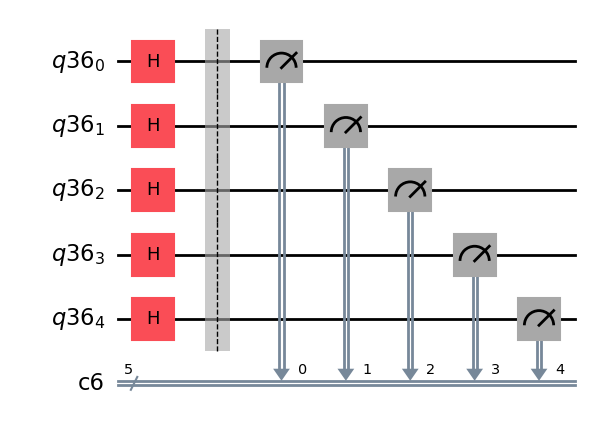

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

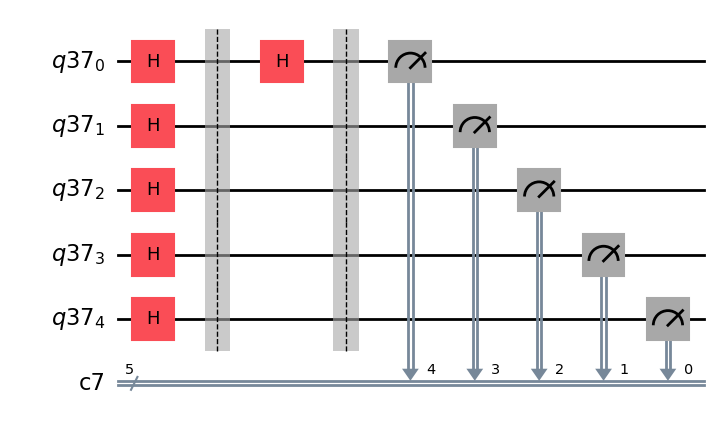

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

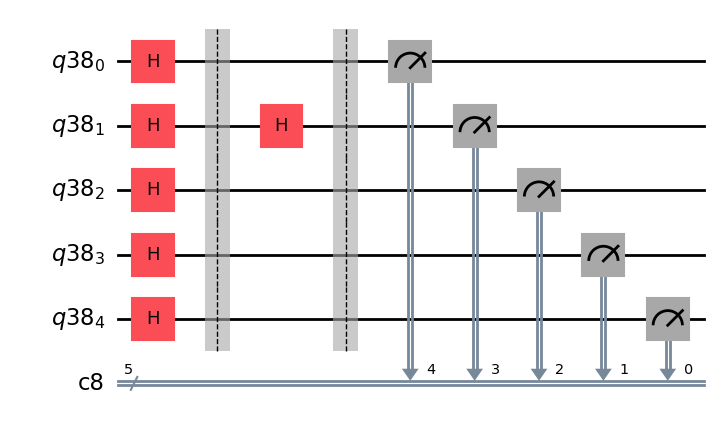

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

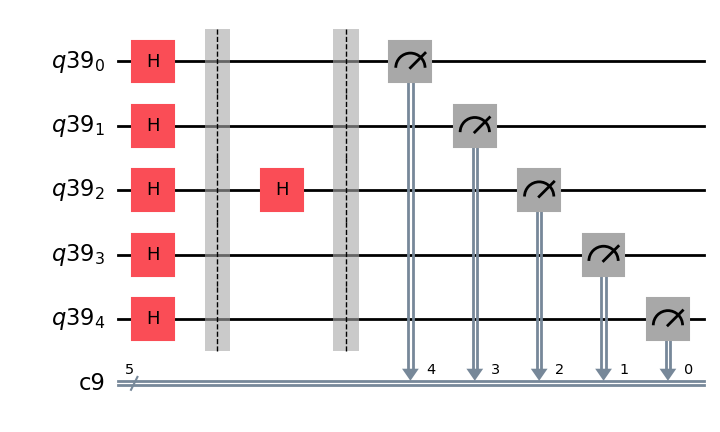

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

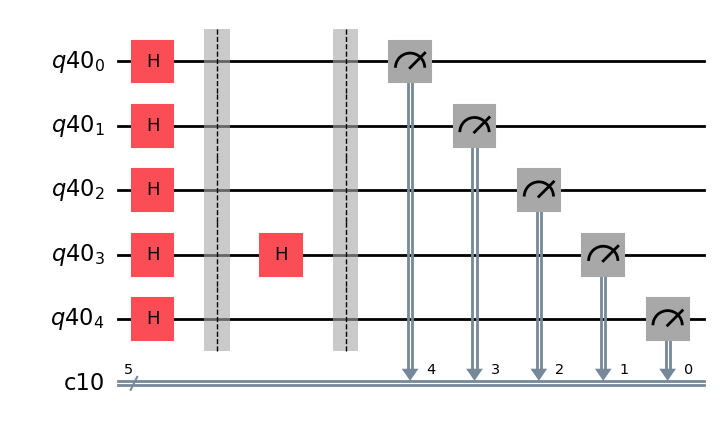

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

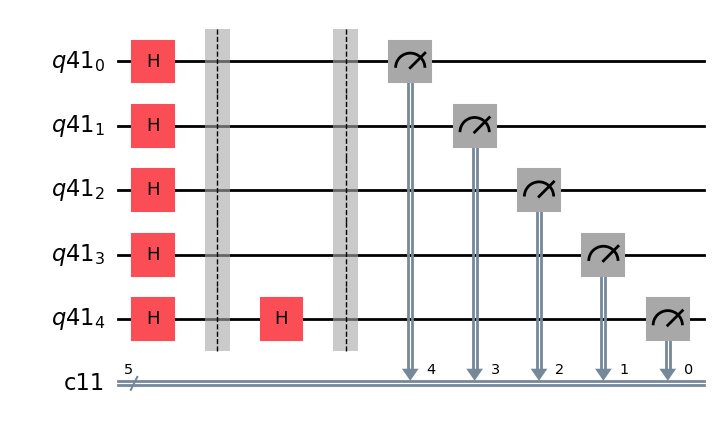

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_cusco")
print(backend)

<IBMBackend('ibm_cusco')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circuit_zz = pm.run(ansatz_zz)
isa_circuit_x0 = pm.run(ansatz_x0)
isa_circuit_x1 = pm.run(ansatz_x1)
isa_circuit_x2 = pm.run(ansatz_x2)
isa_circuit_x3 = pm.run(ansatz_x3)
isa_circuit_x4 = pm.run(ansatz_x4)


options = Options()
options.optimization_level = 3
options.resilience_level = 1

sampler = Sampler(backend=backend, options=options)

## Cost Function for VQNHE

In [ ]:
job = sampler.run(isa_circuit_zz, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.032064735059381, 1: 0.031260896487118, 2: 0.03077430457768, 3: 0.034611253012248, 4: 0.027687269358327, 5: 0.033702646632001, 6: 0.03016726463217, 7: 0.034426170744308, 8: 0.028536786377959, 9: 0.029774762947903, 10: 0.027661626325831, 11: 0.032593907317454, 12: 0.0321232849731, 13: 0.031113465934283, 14: 0.032070245064467, 15: 0.03629663440417, 16: 0.035291924626759, 17: 0.034506430161604, 18: 0.034581462957202, 19: 0.032714323662926, 20: 0.033258826389928, 21: 0.029948848255714, 22: 0.031296987572883, 23: 0.03391852864731, 24: 0.026315500784732, 25: 0.029038524330761, 26: 0.028573786573358, 27: 0.027769116678121, 28: 0.027856549312702, 29: 0.027649094852054, 30: 0.03043697547386, 31: 0.031977865871687}

In [ ]:
job = sampler.run(isa_circuit_x0, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.06566638535256, 1: 0.070937098547855, 2: 0.062230320521262, 3: 0.057127256663647, 4: 0.065564289250761, 5: 0.063374467484088, 6: 0.058768010460823, 7: 0.061904209988175, 8: 0.067807281101493, 9: 0.062467130422544, 10: 0.053010300677583, 11: 0.058347143060436, 12: 0.058688411465756, 13: 0.069593881942363, 14: 0.060486450002402, 15: 0.064608606811239, 16: 0.000516481029147, 17: -0.000328299542937, 18: -8.965335777e-06, 19: 0.000539050406534, 20: 3.262431509e-06, 21: -0.000116432311705, 22: 0.000943142975712, 23: 0.000852069451553, 24: -0.000836830445211, 25: -0.000518564850932, 26: -0.000519614435801, 27: -0.000717552988318, 28: -0.000442223383787, 29: 0.000165888673482, 30: -0.000156883425977, 31: 4.4227999521e-05}

In [ ]:
job = sampler.run(isa_circuit_x1, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.064635174867538, 1: 0.06882184521987, 2: 0.059135409887761, 3: 0.056380000611112, 4: 0.067695366631661, 5: 0.064632603848201, 6: 0.059550368252226, 7: 0.065623130570589, 8: -0.000497385669219, 9: -0.000455474694315, 10: -0.000116804798452, 11: 0.000792349559296, 12: 0.000425028018315, 13: 0.000119437009969, 14: -7.5455291037e-05, 15: 0.000179256041676, 16: 0.066505433844986, 17: 0.067742273178964, 18: 0.058893383551687, 19: 0.053042927067546, 20: 0.065305518423547, 21: 0.065043881353921, 22: 0.058131525640373, 23: 0.059750763140717, 24: 0.00033375825078, 25: 0.00014187011326, 26: -0.000484688611428, 27: -0.000271652634344, 28: -0.000306439521009, 29: -0.000303427802418, 30: -0.0002453808709, 31: -0.000124595190872}

In [ ]:
job = sampler.run(isa_circuit_x2, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.06157992956185, 1: 0.066210026972111, 2: 0.063582330347808, 3: 0.062664863354475, 4: -0.000147268595216, 5: 0.000424813071871, 7: -8.4044535167e-05, 8: 0.061309011463927, 9: 0.069920328277547, 10: 0.057201689520261, 11: 0.059095512331395, 12: 0.000128744618598, 13: 0.000260812213877, 15: -5.3038159979e-05, 16: 0.064477281227921, 17: 0.065725628711758, 18: 0.061350608390979, 19: 0.056698040706412, 20: -0.000211018021147, 21: 0.000298637693966, 22: 0.00043310276971, 23: -0.000200752069215, 24: 0.062699748966571, 25: 0.063800126054829, 26: 0.063422097477131, 27: 0.059068683168055, 28: 0.0001408582584, 29: 0.000137479227142, 30: 9.3564629489e-05, 31: -2.7797635358e-05, 6: 0, 14: 0}

In [ ]:
job = sampler.run(isa_circuit_x3, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.072955328824548, 1: 0.063739217389772, 2: -0.006023224913104, 3: -0.00355346512342, 4: 0.071605159791526, 5: 0.06725272230443, 6: -0.005667096485995, 7: -0.003865504396223, 8: 0.066238631668003, 9: 0.06649029020892, 10: -0.005670378455152, 11: -0.003919311570059, 12: 0.072455316543937, 13: 0.065213566852632, 14: -0.005345009321006, 15: -0.004589064232481, 16: 0.068783295583685, 17: 0.068477178167271, 18: -0.005089356588346, 19: -0.004202664691562, 20: 0.065310977725225, 21: 0.065423400032289, 22: -0.00420918385395, 23: -0.005225625836624, 24: 0.063648682864776, 25: 0.071253436308951, 26: -0.004276218795931, 27: -0.005874161684759, 28: 0.066406882283076, 29: 0.062503655809478, 30: -0.005537447593351, 31: -0.004710028816559}

In [ ]:
job = sampler.run(isa_circuit_x4, shots=8000).result()
prob_string = job.quasi_dists[0]

for i in range(32):
  if not (i in prob_string):  prob_string[i] = 0

prob_string

{0: 0.066518559893829, 1: -0.001483448547048, 2: 0.056583172057574, 3: 0.000405543143645, 4: 0.069826275112034, 5: 0.000285000838612, 6: 0.060221059839712, 7: -0.00039868562764, 8: 0.065638843509201, 9: -0.001138958744609, 10: 0.057628277999612, 11: -0.00101261977295, 12: 0.068036535961301, 13: -8.1639964559e-05, 14: 0.057563554090977, 15: 0.000379790824289, 16: 0.066794564479741, 17: 0.000705155874001, 18: 0.058010024723678, 19: -0.000536211775764, 20: 0.067622315647754, 21: -0.000986434591723, 22: 0.052193930863795, 23: 0.000170228239453, 24: 0.073827789572959, 25: -0.000117566492355, 26: 0.060450272421869, 27: -0.000119189507059, 28: 0.067795643817877, 29: 0.000236720390561, 30: 0.055671214188999, 31: -0.000689718467762}

In [ ]:
prob_string_zz = {3: 0.02825, 10: 0.02875, 23: 0.031375, 30: 0.030625, 9: 0.0265, 17: 0.032375, 14: 0.03425, 18: 0.02925, 27: 0.03075, 28: 0.035125, 4: 0.03225, 0: 0.032375, 11: 0.0325, 20: 0.033, 31: 0.031625, 19: 0.03525, 16: 0.027875, 5: 0.03, 13: 0.030625, 8: 0.032625, 24: 0.032125, 21: 0.03375, 7: 0.034125, 12: 0.029125, 2: 0.032875, 25: 0.035625, 29: 0.029125, 26: 0.030375, 22: 0.02975, 1: 0.03, 6: 0.028, 15: 0.02975}
prob_string_x0 = {0: 0.06566638535256, 1: 0.070937098547855, 2: 0.062230320521262, 3: 0.057127256663647, 4: 0.065564289250761, 5: 0.063374467484088, 6: 0.058768010460823, 7: 0.061904209988175, 8: 0.067807281101493, 9: 0.062467130422544, 10: 0.053010300677583, 11: 0.058347143060436, 12: 0.058688411465756, 13: 0.069593881942363, 14: 0.060486450002402, 15: 0.064608606811239, 16: 0.000516481029147, 17: -0.000328299542937, 18: -8.965335777e-06, 19: 0.000539050406534, 20: 3.262431509e-06, 21: -0.000116432311705, 22: 0.000943142975712, 23: 0.000852069451553, 24: -0.000836830445211, 25: -0.000518564850932, 26: -0.000519614435801, 27: -0.000717552988318, 28: -0.000442223383787, 29: 0.000165888673482, 30: -0.000156883425977, 31: 4.4227999521e-05}
prob_string_x1 = {0: 0.064635174867538, 1: 0.06882184521987, 2: 0.059135409887761, 3: 0.056380000611112, 4: 0.067695366631661, 5: 0.064632603848201, 6: 0.059550368252226, 7: 0.065623130570589, 8: -0.000497385669219, 9: -0.000455474694315, 10: -0.000116804798452, 11: 0.000792349559296, 12: 0.000425028018315, 13: 0.000119437009969, 14: -7.5455291037e-05, 15: 0.000179256041676, 16: 0.066505433844986, 17: 0.067742273178964, 18: 0.058893383551687, 19: 0.053042927067546, 20: 0.065305518423547, 21: 0.065043881353921, 22: 0.058131525640373, 23: 0.059750763140717, 24: 0.00033375825078, 25: 0.00014187011326, 26: -0.000484688611428, 27: -0.000271652634344, 28: -0.000306439521009, 29: -0.000303427802418, 30: -0.0002453808709, 31: -0.000124595190872}
prob_string_x2 = {0: 0.06157992956185, 1: 0.066210026972111, 2: 0.063582330347808, 3: 0.062664863354475, 4: -0.000147268595216, 5: 0.000424813071871, 7: -8.4044535167e-05, 8: 0.061309011463927, 9: 0.069920328277547, 10: 0.057201689520261, 11: 0.059095512331395, 12: 0.000128744618598, 13: 0.000260812213877, 15: -5.3038159979e-05, 16: 0.064477281227921, 17: 0.065725628711758, 18: 0.061350608390979, 19: 0.056698040706412, 20: -0.000211018021147, 21: 0.000298637693966, 22: 0.00043310276971, 23: -0.000200752069215, 24: 0.062699748966571, 25: 0.063800126054829, 26: 0.063422097477131, 27: 0.059068683168055, 28: 0.0001408582584, 29: 0.000137479227142, 30: 9.3564629489e-05, 31: -2.7797635358e-05, 6: 0, 14: 0}
prob_string_x3 = {0: 0.072955328824548, 1: 0.063739217389772, 2: -0.006023224913104, 3: -0.00355346512342, 4: 0.071605159791526, 5: 0.06725272230443, 6: -0.005667096485995, 7: -0.003865504396223, 8: 0.066238631668003, 9: 0.06649029020892, 10: -0.005670378455152, 11: -0.003919311570059, 12: 0.072455316543937, 13: 0.065213566852632, 14: -0.005345009321006, 15: -0.004589064232481, 16: 0.068783295583685, 17: 0.068477178167271, 18: -0.005089356588346, 19: -0.004202664691562, 20: 0.065310977725225, 21: 0.065423400032289, 22: -0.00420918385395, 23: -0.005225625836624, 24: 0.063648682864776, 25: 0.071253436308951, 26: -0.004276218795931, 27: -0.005874161684759, 28: 0.066406882283076, 29: 0.062503655809478, 30: -0.005537447593351, 31: -0.004710028816559}
prob_string_x4 = {0: 0.066518559893829, 1: -0.001483448547048, 2: 0.056583172057574, 3: 0.000405543143645, 4: 0.069826275112034, 5: 0.000285000838612, 6: 0.060221059839712, 7: -0.00039868562764, 8: 0.065638843509201, 9: -0.001138958744609, 10: 0.057628277999612, 11: -0.00101261977295, 12: 0.068036535961301, 13: -8.1639964559e-05, 14: 0.057563554090977, 15: 0.000379790824289, 16: 0.066794564479741, 17: 0.000705155874001, 18: 0.058010024723678, 19: -0.000536211775764, 20: 0.067622315647754, 21: -0.000986434591723, 22: 0.052193930863795, 23: 0.000170228239453, 24: 0.073827789572959, 25: -0.000117566492355, 26: 0.060450272421869, 27: -0.000119189507059, 28: 0.067795643817877, 29: 0.000236720390561, 30: 0.055671214188999, 31: -0.000689718467762}

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 20 times

np.random.seed(k)

k 0~20

In [ ]:
local_minimum_list = []

for k in range(20):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

array([-6.1748946 , -6.1748946 , -6.1748946 , -5.35462958, -6.1748946 ,
       -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -5.35050034,
       -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 ,
       -6.05621824, -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 ])

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([[-0.86339623,  0.81093182, -0.39679412, -0.84932199, -0.56040081,
        0.93995241, -0.43112417, -0.77400871,  0.59841401,  0.42727098,
       -0.89929667,  0.19045159,  0.45461081, -0.46646494, -0.80630914,
       -0.22332384, -0.75761341,  1.16000057, -0.2392777 ,  0.19936165,
       -0.99508663,  0.54103464,  0.30430502,  0.023238  ,  0.42072309,
       -0.06838144, -1.17040142,  0.44356257, -0.90009151,  1.3338513 ,
       -0.8484049 ,  0.4414077 , -0.5419115 , -0.14679306, -0.37040151,
       -0.36607905,  0.21760336, -1.1681079 ,  0.68929039,  0.32356173,
       -1.01425919, -0.77653455, -0.85641643,  1.08670042, -0.10314388,
       -1.09476078, -0.23231759, -0.06998325,  0.75188917,  1.05823737,
       -0.67726482,  0.10223296,  0.76770133,  0.90950316,  0.80451621,
        0.21267275,  1.00199258,  0.38515965, -0.12098148, -1.05471363,
        0.72632572, -0.82026343,  0.48892239,  0.75083472,  0.78471874,
        0.57390784,  0.18850889, -0.28620015, -0.47921286, -0.15231203,
        0.37717392,  0.39700737, -1.05889587, -0.38240411,  0.62574491,
       -0.34212886,  0.93388982, -0.31104158,  1.16057438, -0.33449125,
        0.30882164,  0.09732806, -0.42573339,  0.61888785, -1.26538562,
       -0.15430042, -0.55473345, -0.50212139,  0.20493563, -0.54257488,
        0.26005515,  0.43582962, -0.18677993, -0.87283662, -0.86866495,
       -0.62710735, -0.43515064, -0.2421783 ,  0.6408531 , -0.7861768 ,
        0.73663992, -0.24059139, -0.47284752,  0.59999532,  1.05980329,
        0.83836178,  0.65857223,  1.04272802, -0.16361619,  0.41353519,
       -0.70338698, -0.30245538,  0.89319991,  0.60905533,  0.56788794,
       -0.53207054, -0.981576  ,  0.70343629,  0.3992778 ,  0.77939878,
        0.76306411,  0.08996982, -0.2025114 , -0.72168668,  0.04739277,
        0.43040313,  0.53812074, -0.46165957, -0.81510433,  1.25048222,
       -0.39339063, -0.3371414 , -0.88662747, -0.94127101, -0.74773826,
       -0.80079771, -0.67563852, -0.69823721, -0.3752192 ,  0.11960123,
       -0.30335706, -0.34321848,  0.19699018, -0.87250029,  0.03906074,
       -0.38135845, -0.49678361,  0.00624114,  0.0834867 ,  0.08001   ,
        0.21107328, -0.84926573,  0.11943593, -0.2247031 , -0.58524315,
       -0.24021761, -0.63276717, -0.02727521, -0.87894687, -0.91516173,
        0.35696076, -0.65078879,  0.21101909,  0.49149953,  0.734938  ,
       -0.24707057, -0.79335177, -0.42836838, -0.46850209,  0.47036624,
        0.68874497, -0.42357147,  0.78290695, -0.59307705, -1.07592575,
       -0.05772232, -0.23683438,  0.9167891 , -0.07458273,  0.46070337,
       -0.90843271, -0.74745588,  0.33953515,  0.36849386, -0.5123437 ,
       -0.95360572,  0.60892998, -0.80548256, -0.76681435, -0.15977344,
       -0.94505398, -0.75280195, -0.96493137, -0.17678137, -0.05508042,
       -0.83463655, -0.56838454,  0.51540558, -0.60527021, -0.1107623 ,
       -0.34431611, -0.9229479 , -0.434222  , -0.71136396,  0.41119258,
        0.16090507, -0.35144737,  1.01059415, -0.46160486,  0.82868507,
        0.28583441, -0.30530421,  0.43778194, -1.00209899, -0.13676997,
       -0.06816765,  0.14644876, -0.5235177 ,  1.05279342,  0.74133032,
        0.05384046,  0.34054069, -0.12151292, -0.16353395, -0.29602617,
        0.51235014, -0.69614429,  0.96839544,  0.50747579, -0.72768373,
       -0.14041751, -0.8069186 , -0.28928027,  0.51696175, -0.17096747,
       -0.69123363,  0.48288455, -0.08721006, -0.75340432, -0.23629223,
       -0.61572774, -0.40801789,  0.68869884,  0.09106572,  0.63313237,
        0.65707891, -0.20124759,  0.25137252,  0.15875141, -0.01521144,
        0.10982552, -0.09475191,  0.47240288,  0.60259748, -0.19286715,
        0.53972785, -0.17248511, -0.72172431,  0.54999697,  0.4039561 ,
       -0.30857881,  0.06533321, -0.73837943,  0.44428829,  0.46348383,
        0.43612744, -0.24357671,  0.39072172, -0.54214694, -0.15221759,
        2.03173981]])

## Plot Result of VQNHE in Noiseless Simulator

Neural Net Lowest Energy Configurations for 20 times

[-6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.05621824, -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946, -6.132248979034366, -6.174894600388464 ]

VQfixedNHE Lowest Energy Configuration

[-5.845117796097617]

VQNHE Lowest Energy Configuration for 10 times

[-6.20387731, -6.19907682, -6.20387731, -6.19474288, -5.90438281, -5.90005932, -6.20387731, -6.20387731, -6.20387731, -5.75011618]

VQE Lowest Energy Configuration for 10 times

[-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458]

In [ ]:
nn_minimum_list = np.array([-6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.05621824, -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946, -6.132248979034366, -6.174894600388464 ])

In [ ]:
vqfixednhe_minimum = np.array([-5.845117796097617])

In [ ]:
vqnhe_minimum_list = np.array([-6.20387731, -6.19907682, -6.20387731, -6.19474288, -5.90438281, -5.90005932, -6.20387731, -6.20387731, -6.20387731, -5.75011618])

In [ ]:
vqe_minimum_list = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -6.1668285009711425
variance : 0.0007300744169763567
maximum : -6.05621824
minimum : -6.174894600388464

[-6.1748946  -6.1748946  -6.1748946  -6.1748946  -6.1748946  -6.1748946
 -6.1748946  -6.1748946  -6.1748946  -6.1748946  -6.1748946  -6.1748946
 -6.1748946  -6.05621824 -6.1748946  -6.1748946  -6.1748946  -6.1748946
 -6.13224898 -6.1748946 ]


In [ ]:
print(vqfixednhe_minimum)

[-5.8451178]


In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -6.096776456000001
variance : 0.027330204291713865
maximum : -5.75011618
minimum : -6.20387731

[-6.20387731 -6.19907682 -6.20387731 -6.19474288 -5.90438281 -5.90005932
 -6.20387731 -6.20387731 -6.20387731 -5.75011618]


In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.722296947
variance : 0.0014535559200360005
maximum : -5.64541463
minimum : -5.76632458

[-5.72749676 -5.72937777 -5.73962453 -5.7612482  -5.68476149 -5.6843978
 -5.64541463 -5.76621523 -5.71810848 -5.76632458]


# VQE, VQNHE, VQfixedNHE, NN Data & Figure

In [ ]:
import numpy as np

vqe_noiseless = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116, -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 , -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521 , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418 , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247])

vqe_bitflip_1 = np.array([-5.606, -5.71875, -5.60175, -5.698, -5.78125, -5.767, -5.5845, -5.645, -5.69425, -5.51475, -5.56775, -5.75575, -5.769, -5.57125, -5.64275, -5.74275, -5.5175, -5.7255, -5.666, -5.73625, -5.723, -5.7545, -5.6705, -5.60075, -5.52975, -5.6935, -5.61425, -5.6985, -5.69325, -5.6845, -5.73225, -5.72175, -5.6815, -5.31325, -5.7015, -5.70625, -5.68925, -5.738, -5.71325, -5.672, -5.66375, -5.618, -5.6725, -5.6015, -5.615, -5.7535, -5.52925, -5.767, -5.736, -5.7325, -5.647, -5.6445, -5.72275, -5.55, -5.67225, -5.68075, -5.7195, -5.6425, -5.7215, -5.60475, -5.72025, -5.709, -5.58275, -5.7115, -5.7125, -5.6935, -5.6955, -5.53825, -5.53225, -5.52125, -5.64025, -5.644, -5.7355, -5.6575, -5.6785, -5.56625, -5.762, -5.6985, -5.697, -5.63975, -5.61525, -5.68075, -5.76425, -5.7605, -5.699, -5.57325, -5.707, -5.57125, -5.74275, -5.68675, -5.4285, -5.7675, -5.76325, -5.6595, -5.71025, -5.66375, -5.6435, -5.726, -5.67075, -5.62425])

vqe_depolarization_1 = np.array([-5.464, -5.5505, -5.50125, -5.64825, -5.70225, -5.70025, -5.43825, -5.57275, -5.4745, -5.6055, -5.66075, -5.692, -5.68175, -5.47775, -5.317, -5.67375, -5.529, -5.657, -5.55025, -5.46625, -5.69025, -5.67975, -5.631, -5.4515, -5.412, -5.6265, -5.53575, -5.43025, -5.5855, -5.4955, -5.6855, -5.6505, -5.672, -5.35175, -5.65225, -5.65475, -5.4135, -5.56525, -5.438, -5.6115, -5.5225, -5.52325, -5.55525, -5.501, -5.3635, -5.70075, -5.649, -5.7025, -5.4855, -5.625, -5.6135, -5.633, -5.43725, -5.46675, -5.6255, -5.704, -5.432, -5.55775, -5.686, -5.511, -5.4655, -5.68625, -5.5895, -5.5275, -5.5875, -5.432, -5.30525, -5.475, -5.6845, -5.6685, -5.56775, -5.686, -5.502, -5.615, -5.6445, -5.5425, -5.67275, -5.57275, -5.614, -5.57625, -5.68275, -5.572, -5.68975, -5.66025, -5.5175, -5.597, -5.653, -5.49375, -5.71, -5.3725, -5.61425, -5.67175, -5.671, -5.55375, -5.63675, -5.5605, -5.66775, -5.65575, -5.62475, -5.5515 ])

vqe_cusco_0 = np.array([-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258])

vqe_cusco_1 = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

vqe_cusco_2 = np.array([-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282])

vqe_cusco_3 = np.array([-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837])


print("vqe_noiseless")
print("mean : {0}".format(np.mean(vqe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_noiseless))))
print("maximum : {0}".format(np.max(vqe_noiseless)))
print("minimum : {0}".format(np.min(vqe_noiseless)))
print()
print()


print("vqe_bitflip_1")
print("mean : {0}".format(np.mean(vqe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_bitflip_1))))
print("maximum : {0}".format(np.max(vqe_bitflip_1)))
print("minimum : {0}".format(np.min(vqe_bitflip_1)))
print()
print()


print("vqe_depolarization_1")
print("mean : {0}".format(np.mean(vqe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_depolarization_1))))
print("maximum : {0}".format(np.max(vqe_depolarization_1)))
print("minimum : {0}".format(np.min(vqe_depolarization_1)))
print()
print()


print("vqe_cusco_0")
print("mean : {0}".format(np.mean(vqe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_0))))
print("maximum : {0}".format(np.max(vqe_cusco_0)))
print("minimum : {0}".format(np.min(vqe_cusco_0)))
print()
print()


print("vqe_cusco_1")
print("mean : {0}".format(np.mean(vqe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_1))))
print("maximum : {0}".format(np.max(vqe_cusco_1)))
print("minimum : {0}".format(np.min(vqe_cusco_1)))
print()
print()


print("vqe_cusco_2")
print("mean : {0}".format(np.mean(vqe_cusco_2)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_2))))
print("maximum : {0}".format(np.max(vqe_cusco_2)))
print("minimum : {0}".format(np.min(vqe_cusco_2)))
print()
print()


print("vqe_cusco_3")
print("mean : {0}".format(np.mean(vqe_cusco_3)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_3))))
print("maximum : {0}".format(np.max(vqe_cusco_3)))
print("minimum : {0}".format(np.min(vqe_cusco_3)))
print()
print()

vqe_noiseless
mean : -5.8822224289000005
stdev : 0.023394008024182674
maximum : -5.82299708
minimum : -5.89722894


vqe_bitflip_1
mean : -5.665257499999999
stdev : 0.07990144284523278
maximum : -5.31325
minimum : -5.78125


vqe_depolarization_1
mean : -5.5746225
stdev : 0.09975300430939411
maximum : -5.30525
minimum : -5.71


vqe_cusco_0
mean : -5.2489746109999995
stdev : 0.07404667190690961
maximum : -5.06079102
minimum : -5.31274414


vqe_cusco_1
mean : -5.722296947
stdev : 0.038125528455826035
maximum : -5.64541463
minimum : -5.76632458


vqe_cusco_2
mean : -5.702974453000001
stdev : 0.0334461269186218
maximum : -5.62487282
minimum : -5.74666425


vqe_cusco_3
mean : -5.726894045
stdev : 0.45485764530500655
maximum : -4.62640797
minimum : -6.22839352




In [ ]:
import numpy as np

vqnhe_noiseless = np.array([-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224, -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737, -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823, -5.9406369, -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, -6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368])

vqnhe_bitflip_1 = np.array([-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634])

vqnhe_depolarization_1 = np.array([-5.9053623802295565, -5.905284848147373, -5.905211478978276, -5.895858287602114, -5.9053670725564595, -5.8043448004934834, -5.804216265436067, -5.9053671677560144, -5.752514185468417, -5.897287131337429, -5.90536716339884, -5.905367166698549, -5.905367169860917, -5.905366212511115, -5.904065368082751, -5.903511757937208, -5.902001867053614, -5.90536713629146, -5.905367170062944, -5.696496721765803, -5.752514690831475, -5.897556454107229, -5.905367157774968, -5.905367169035556, -5.835788569713097, -5.905367168407769, -5.892477704240274, -5.905366768357541, -5.713177433384576, -5.855618175239319, -5.905367132178551, -5.902231709331003, -5.897446083779941, -5.752514879860089, -5.89728312783902, -5.905367170026302, -5.751604752708811, -5.866904315858801, -5.897398650176224, -5.905367160053486, -5.905367141533028, -5.905367136958099, -5.897443379760443, -5.718947929766712, -5.801289565304456, -5.905359403128855, -5.896698642251029, -5.905367030164439, -5.905278886377779, -5.6827271876812695, -5.734734249353867, -5.9053623802295565, -5.905284848147373, -5.905211478978276, -5.895858287602114, -5.9053670725564595, -5.8043448004934834, -5.804216265436067, -5.9053671677560144, -5.752514185468417, -5.897287131337429, -5.90536716339884, -5.905367166698549, -5.905367169860917, -5.905366212511115, -5.904065368082751, -5.903511757937208, -5.902001867053614, -5.90536713629146, -5.905367170062944, -5.696496721765803, -5.752514690831475, -5.897556454107229, -5.905367157774968, -5.905367169035556, -5.835788569713097, -5.905367168407769, -5.892477704240274, -5.905366768357541, -5.713177433384576, -5.855618175239319, -5.905367132178551, -5.902231709331003, -5.897446083779941, -5.752514879860089, -5.89728312783902, -5.905367170026302, -5.751604752708811, -5.866904315858801, -5.897398650176224, -5.905367160053486, -5.905367141533028, -5.905367136958099, -5.897285675121541, -5.90528534171424, -5.89742821, -5.80434494, -5.70794607, -5.72243123, -5.90536717])

vqnhe_cusco_0 = np.array([-5.77848119, -5.77848119, -5.71289339, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119])

vqnhe_cusco_1 = np.array([-6.20387731, -6.19907682, -6.20387731, -6.19474288, -5.90438281, -5.90005932, -6.20387731, -6.20387731, -6.20387731, -5.75011618])


print("vqnhe_noiseless")
print("mean : {0}".format(np.mean(vqnhe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_noiseless))))
print("maximum : {0}".format(np.max(vqnhe_noiseless)))
print("minimum : {0}".format(np.min(vqnhe_noiseless)))
print()
print()


print("vqnhe_bitflip_1")
print("mean : {0}".format(np.mean(vqnhe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_bitflip_1))))
print("maximum : {0}".format(np.max(vqnhe_bitflip_1)))
print("minimum : {0}".format(np.min(vqnhe_bitflip_1)))
print()
print()


print("vqnhe_depolarization_1")
print("mean : {0}".format(np.mean(vqnhe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_depolarization_1))))
print("maximum : {0}".format(np.max(vqnhe_depolarization_1)))
print("minimum : {0}".format(np.min(vqnhe_depolarization_1)))
print()
print()


print("vqnhe_cusco_0")
print("mean : {0}".format(np.mean(vqnhe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_cusco_0))))
print("maximum : {0}".format(np.max(vqnhe_cusco_0)))
print("minimum : {0}".format(np.min(vqnhe_cusco_0)))
print()
print()


print("vqnhe_cusco_1")
print("mean : {0}".format(np.mean(vqnhe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_cusco_1))))
print("maximum : {0}".format(np.max(vqnhe_cusco_1)))
print("minimum : {0}".format(np.min(vqnhe_cusco_1)))
print()
print()

vqnhe_noiseless
mean : -5.999104296200001
stdev : 0.038893805718389976
maximum : -5.89828085
minimum : -6.026674


vqnhe_bitflip_1
mean : -5.8948130873
stdev : 0.06541499579938087
maximum : -5.7362738
minimum : -5.94158525


vqnhe_depolarization_1
mean : -5.864477587167517
stdev : 0.06695136090668222
maximum : -5.6827271876812695
minimum : -5.905367170062944


vqnhe_cusco_0
mean : -5.77192241
stdev : 0.01967634000000009
maximum : -5.71289339
minimum : -5.77848119


vqnhe_cusco_1
mean : -6.096776456000001
stdev : 0.16531849349577882
maximum : -5.75011618
minimum : -6.20387731




In [ ]:
import numpy as np

vqfixednhe_noiseless = np.array([-6.026673976585643])

vqfixednhe_bitflip_1 = np.array([-5.841139243087609])

vqfixednhe_depolarization_1 = np.array([-5.717442513718117])

vqfixednhe_cusco_0 = np.array([-5.4995272302983365])

vqfixednhe_cusco_1 = np.array([-5.845117796097617])


print("vqfixednhe_noiseless")
print("mean : {0}".format(np.mean(vqfixednhe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqfixednhe_noiseless))))
print("maximum : {0}".format(np.max(vqfixednhe_noiseless)))
print("minimum : {0}".format(np.min(vqfixednhe_noiseless)))
print()
print()


print("vqfixednhe_bitflip_1")
print("mean : {0}".format(np.mean(vqfixednhe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqfixednhe_bitflip_1))))
print("maximum : {0}".format(np.max(vqfixednhe_bitflip_1)))
print("minimum : {0}".format(np.min(vqfixednhe_bitflip_1)))
print()
print()


print("vqfixednhe_depolarization_1")
print("mean : {0}".format(np.mean(vqfixednhe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqfixednhe_depolarization_1))))
print("maximum : {0}".format(np.max(vqfixednhe_depolarization_1)))
print("minimum : {0}".format(np.min(vqfixednhe_depolarization_1)))
print()
print()


print("vqfixednhe_cusco_0")
print("mean : {0}".format(np.mean(vqfixednhe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqfixednhe_cusco_0))))
print("maximum : {0}".format(np.max(vqfixednhe_cusco_0)))
print("minimum : {0}".format(np.min(vqfixednhe_cusco_0)))
print()
print()


print("vqfixednhe_cusco_1")
print("mean : {0}".format(np.mean(vqfixednhe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqfixednhe_cusco_1))))
print("maximum : {0}".format(np.max(vqfixednhe_cusco_1)))
print("minimum : {0}".format(np.min(vqfixednhe_cusco_1)))
print()
print()

vqfixednhe_noiseless
mean : -6.026673976585643
stdev : 0.0
maximum : -6.026673976585643
minimum : -6.026673976585643


vqfixednhe_bitflip_1
mean : -5.841139243087609
stdev : 0.0
maximum : -5.841139243087609
minimum : -5.841139243087609


vqfixednhe_depolarization_1
mean : -5.717442513718117
stdev : 0.0
maximum : -5.717442513718117
minimum : -5.717442513718117


vqfixednhe_cusco_0
mean : -5.4995272302983365
stdev : 0.0
maximum : -5.4995272302983365
minimum : -5.4995272302983365


vqfixednhe_cusco_1
mean : -5.845117796097617
stdev : 0.0
maximum : -5.845117796097617
minimum : -5.845117796097617




In [ ]:
import numpy as np

nn_noiseless = np.array([-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418])

nn_bitflip_1 = np.array([-6.026677749855398, -6.026677749976061, -6.026677748494037, -6.024063072414603, -6.026677749556434, -6.008426000579483, -6.026677749815028, -6.026677750075579, -6.026677750116603, -6.026677750117541])

nn_depolarization_1 = np.array([-6.026677749855398, -6.026677749976061, -6.026677748494037, -6.024063072414603, -6.026677749556434, -6.008426000579483, -6.026677749815028, -6.026677750075579, -6.026677750116603, -6.026677750117541])

nn_cusco_0 = np.array([-5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.88323559, -5.79917553, -5.81498704])

nn_cusco_1 = np.array([-6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946 , -6.05621824, -6.1748946 , -6.1748946 , -6.1748946 , -6.1748946, -6.132248979034366, -6.174894600388464 ])


print("nn_noiseless")
print("mean : {0}".format(np.mean(nn_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(nn_noiseless))))
print("maximum : {0}".format(np.max(nn_noiseless)))
print("minimum : {0}".format(np.min(nn_noiseless)))
print()
print()


print("nn_bitflip_1")
print("mean : {0}".format(np.mean(nn_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(nn_bitflip_1))))
print("maximum : {0}".format(np.max(nn_bitflip_1)))
print("minimum : {0}".format(np.min(nn_bitflip_1)))
print()
print()


print("nn_depolarization_1")
print("mean : {0}".format(np.mean(nn_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(nn_depolarization_1))))
print("maximum : {0}".format(np.max(nn_depolarization_1)))
print("minimum : {0}".format(np.min(nn_depolarization_1)))
print()
print()


print("nn_cusco_0")
print("mean : {0}".format(np.mean(nn_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(nn_cusco_0))))
print("maximum : {0}".format(np.max(nn_cusco_0)))
print("minimum : {0}".format(np.min(nn_cusco_0)))
print()
print()


print("nn_cusco_1")
print("mean : {0}".format(np.mean(nn_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(nn_cusco_1))))
print("maximum : {0}".format(np.max(nn_cusco_1)))
print("minimum : {0}".format(np.min(nn_cusco_1)))
print()
print()

nn_noiseless
mean : -6.026551306
stdev : 0.0003686219999997853
maximum : -6.02544544
minimum : -6.02667418


nn_bitflip_1
mean : -6.024591107100077
stdev : 0.005444466088303891
maximum : -6.008426000579483
minimum : -6.026677750117541


nn_depolarization_1
mean : -6.024591107100077
stdev : 0.005444466088303891
maximum : -6.008426000579483
minimum : -6.026677750117541


nn_cusco_0
mean : -5.8756201595
stdev : 0.022982670243358826
maximum : -5.79917553
minimum : -5.88323559


nn_cusco_1
mean : -6.1668285009711425
stdev : 0.027019889285049944
maximum : -6.05621824
minimum : -6.174894600388464




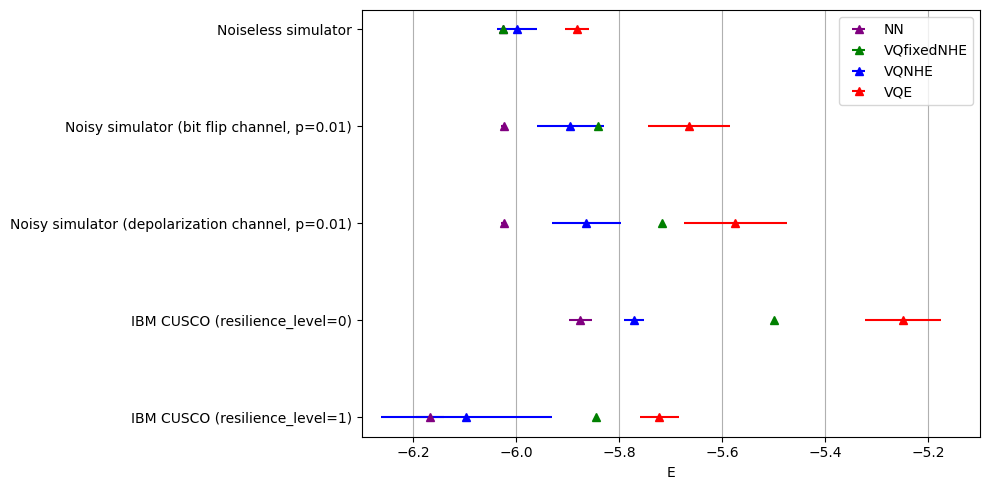

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the plot
# Assuming there are two energy levels for each of the three categories
categories = ['Noiseless simulator', 'Noisy simulator (bit flip channel, p=0.01)', 'Noisy simulator (depolarization channel, p=0.01)',
              'IBM CUSCO (resilience_level=0)', 'IBM CUSCO (resilience_level=1)']
methods = ['NN', 'VQfixedNHE', 'VQNHE', 'VQE']
energies = {
    'Noiseless simulator':                                {'NN': (np.mean(nn_noiseless), np.sqrt(np.var(nn_noiseless))), 'VQfixedNHE': (np.mean(vqfixednhe_noiseless), np.sqrt(np.var(vqfixednhe_noiseless))), 'VQNHE': (np.mean(vqnhe_noiseless), np.sqrt(np.var(vqnhe_noiseless))), 'VQE': (np.mean(vqe_noiseless), np.sqrt(np.var(vqe_noiseless)))},
    'Noisy simulator (bit flip channel, p=0.01)':         {'NN': (np.mean(nn_bitflip_1), np.sqrt(np.var(nn_bitflip_1))), 'VQfixedNHE': (np.mean(vqfixednhe_bitflip_1), np.sqrt(np.var(vqfixednhe_bitflip_1))), 'VQNHE': (np.mean(vqnhe_bitflip_1), np.sqrt(np.var(vqnhe_bitflip_1))), 'VQE': (np.mean(vqe_bitflip_1), np.sqrt(np.var(vqe_bitflip_1)))},
    'Noisy simulator (depolarization channel, p=0.01)':   {'NN': (np.mean(nn_depolarization_1), np.sqrt(np.var(nn_depolarization_1))), 'VQfixedNHE': (np.mean(vqfixednhe_depolarization_1), np.sqrt(np.var(vqfixednhe_depolarization_1))), 'VQNHE': (np.mean(vqnhe_depolarization_1), np.sqrt(np.var(vqnhe_depolarization_1))), 'VQE': (np.mean(vqe_depolarization_1), np.sqrt(np.var(vqe_depolarization_1)))},
    'IBM CUSCO (resilience_level=0)':                     {'NN': (np.mean(nn_cusco_0), np.sqrt(np.var(nn_cusco_0))), 'VQfixedNHE': (np.mean(vqfixednhe_cusco_0), np.sqrt(np.var(vqfixednhe_cusco_0))), 'VQNHE': (np.mean(vqnhe_cusco_0), np.sqrt(np.var(vqnhe_cusco_0))), 'VQE': (np.mean(vqe_cusco_0), np.sqrt(np.var(vqe_cusco_0)))},
    'IBM CUSCO (resilience_level=1)':                     {'NN': (np.mean(nn_cusco_1), np.sqrt(np.var(nn_cusco_1))), 'VQfixedNHE': (np.mean(vqfixednhe_cusco_1), np.sqrt(np.var(vqfixednhe_cusco_1))), 'VQNHE': (np.mean(vqnhe_cusco_1), np.sqrt(np.var(vqnhe_cusco_1))), 'VQE': (np.mean(vqe_cusco_1), np.sqrt(np.var(vqe_cusco_1)))},
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean, error = energies[category][method]
        marker = '^'
        color = 'red' if method == 'VQE' else 'green' if method == 'VQfixedNHE' else 'purple' if method == 'NN' else 'blue'
        ax.errorbar(mean, i, xerr=error, fmt=marker, color=color, label=method if i == 0 else "")

# Customizing the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Invert y-axis to match the uploaded image
ax.set_xlabel('E')
ax.xaxis.grid(True)  # Add a grid on x-axis
ax.set_xlim(-6.30, -5.10)  # Set the limit for x-axis to match the uploaded image

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

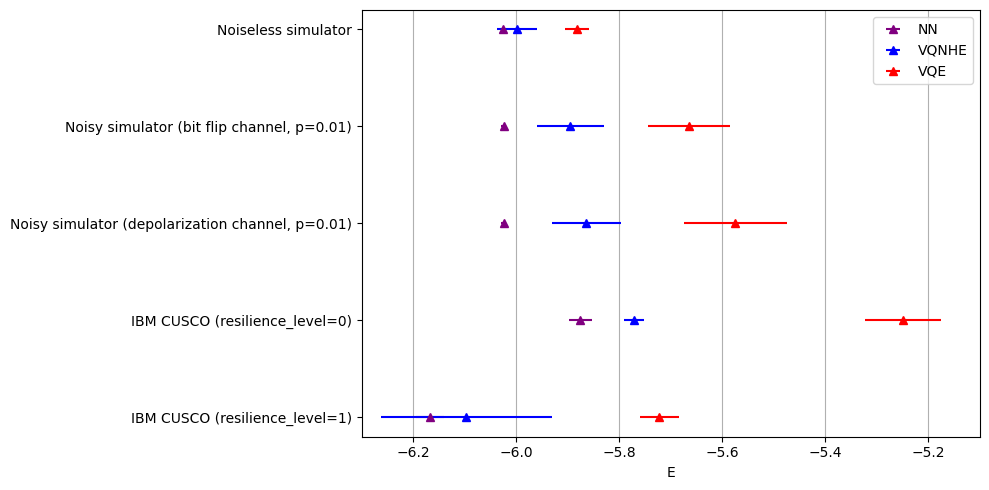

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the plot
# Assuming there are two energy levels for each of the three categories
categories = ['Noiseless simulator', 'Noisy simulator (bit flip channel, p=0.01)', 'Noisy simulator (depolarization channel, p=0.01)',
              'IBM CUSCO (resilience_level=0)', 'IBM CUSCO (resilience_level=1)']
methods = ['NN', 'VQNHE', 'VQE']
energies = {
    'Noiseless simulator':                                {'NN': (np.mean(nn_noiseless), np.sqrt(np.var(nn_noiseless))), 'VQNHE': (np.mean(vqnhe_noiseless), np.sqrt(np.var(vqnhe_noiseless))), 'VQE': (np.mean(vqe_noiseless), np.sqrt(np.var(vqe_noiseless)))},
    'Noisy simulator (bit flip channel, p=0.01)':         {'NN': (np.mean(nn_bitflip_1), np.sqrt(np.var(nn_bitflip_1))), 'VQNHE': (np.mean(vqnhe_bitflip_1), np.sqrt(np.var(vqnhe_bitflip_1))), 'VQE': (np.mean(vqe_bitflip_1), np.sqrt(np.var(vqe_bitflip_1)))},
    'Noisy simulator (depolarization channel, p=0.01)':   {'NN': (np.mean(nn_depolarization_1), np.sqrt(np.var(nn_depolarization_1))), 'VQNHE': (np.mean(vqnhe_depolarization_1), np.sqrt(np.var(vqnhe_depolarization_1))), 'VQE': (np.mean(vqe_depolarization_1), np.sqrt(np.var(vqe_depolarization_1)))},
    'IBM CUSCO (resilience_level=0)':                     {'NN': (np.mean(nn_cusco_0), np.sqrt(np.var(nn_cusco_0))), 'VQNHE': (np.mean(vqnhe_cusco_0), np.sqrt(np.var(vqnhe_cusco_0))), 'VQE': (np.mean(vqe_cusco_0), np.sqrt(np.var(vqe_cusco_0)))},
    'IBM CUSCO (resilience_level=1)':                     {'NN': (np.mean(nn_cusco_1), np.sqrt(np.var(nn_cusco_1))), 'VQNHE': (np.mean(vqnhe_cusco_1), np.sqrt(np.var(vqnhe_cusco_1))), 'VQE': (np.mean(vqe_cusco_1), np.sqrt(np.var(vqe_cusco_1)))},
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean, error = energies[category][method]
        marker = '^'
        color = 'red' if method == 'VQE' else 'purple' if method == 'NN' else 'blue'
        ax.errorbar(mean, i, xerr=error, fmt=marker, color=color, label=method if i == 0 else "")

# Customizing the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Invert y-axis to match the uploaded image
ax.set_xlabel('E')
ax.xaxis.grid(True)  # Add a grid on x-axis
ax.set_xlim(-6.30, -5.10)  # Set the limit for x-axis to match the uploaded image

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

# NN in IBM Hardware (IBM CUSCO, resilience_level=0)

1. Apply randomized PQC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

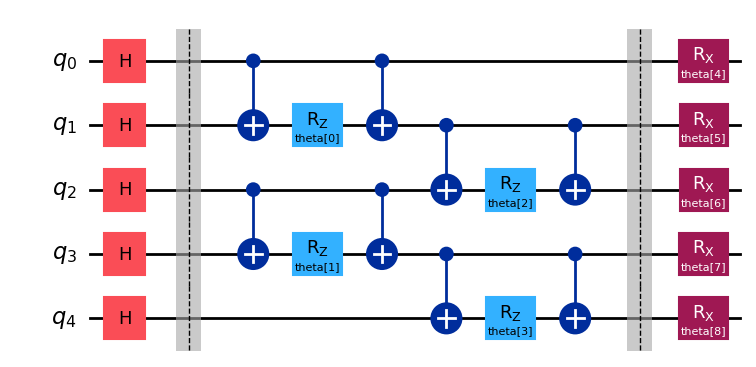

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

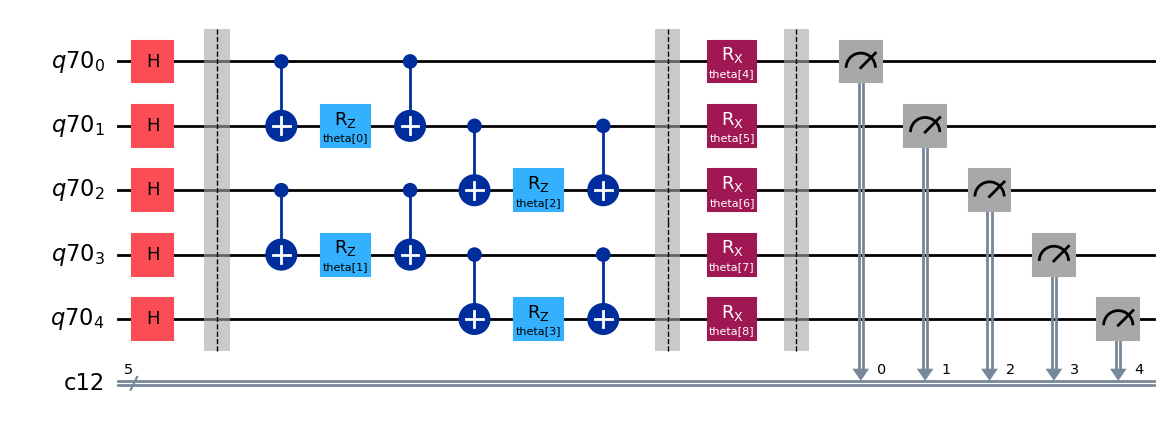

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.cx(0, 1)
ansatz_zz.cx(2, 3)
ansatz_zz.rz(next(it), 1)
ansatz_zz.rz(next(it), 3)
ansatz_zz.cx(0, 1)
ansatz_zz.cx(2, 3)
ansatz_zz.cx(1, 2)
ansatz_zz.cx(3, 4)
ansatz_zz.rz(next(it), 2)
ansatz_zz.rz(next(it), 4)
ansatz_zz.cx(1, 2)
ansatz_zz.cx(3, 4)

ansatz_zz.barrier()

ansatz_zz.rx(next(it), 0)
ansatz_zz.rx(next(it), 1)
ansatz_zz.rx(next(it), 2)
ansatz_zz.rx(next(it), 3)
ansatz_zz.rx(next(it), 4)

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

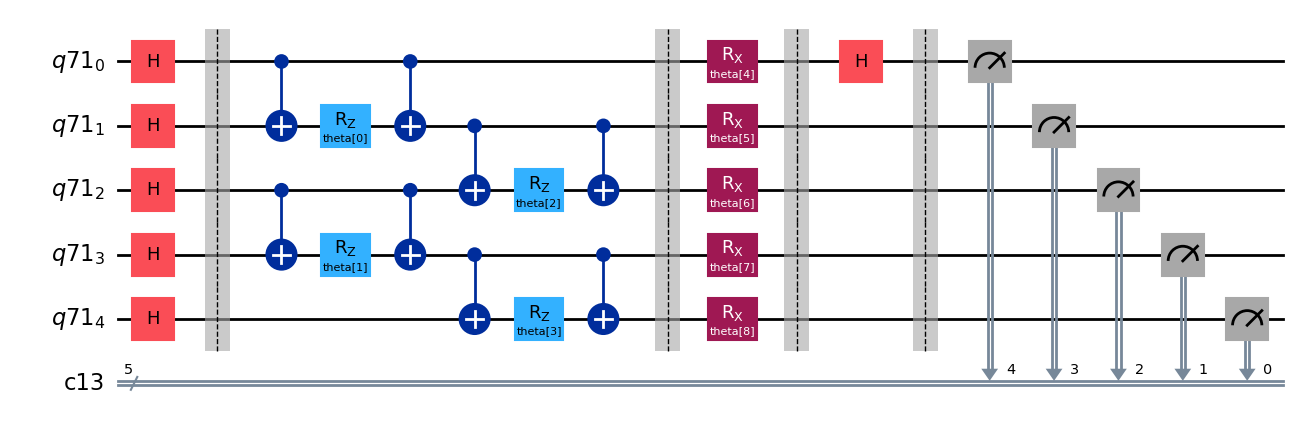

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.cx(0, 1)
ansatz_x0.cx(2, 3)
ansatz_x0.rz(next(it), 1)
ansatz_x0.rz(next(it), 3)
ansatz_x0.cx(0, 1)
ansatz_x0.cx(2, 3)
ansatz_x0.cx(1, 2)
ansatz_x0.cx(3, 4)
ansatz_x0.rz(next(it), 2)
ansatz_x0.rz(next(it), 4)
ansatz_x0.cx(1, 2)
ansatz_x0.cx(3, 4)

ansatz_x0.barrier()

ansatz_x0.rx(next(it), 0)
ansatz_x0.rx(next(it), 1)
ansatz_x0.rx(next(it), 2)
ansatz_x0.rx(next(it), 3)
ansatz_x0.rx(next(it), 4)

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

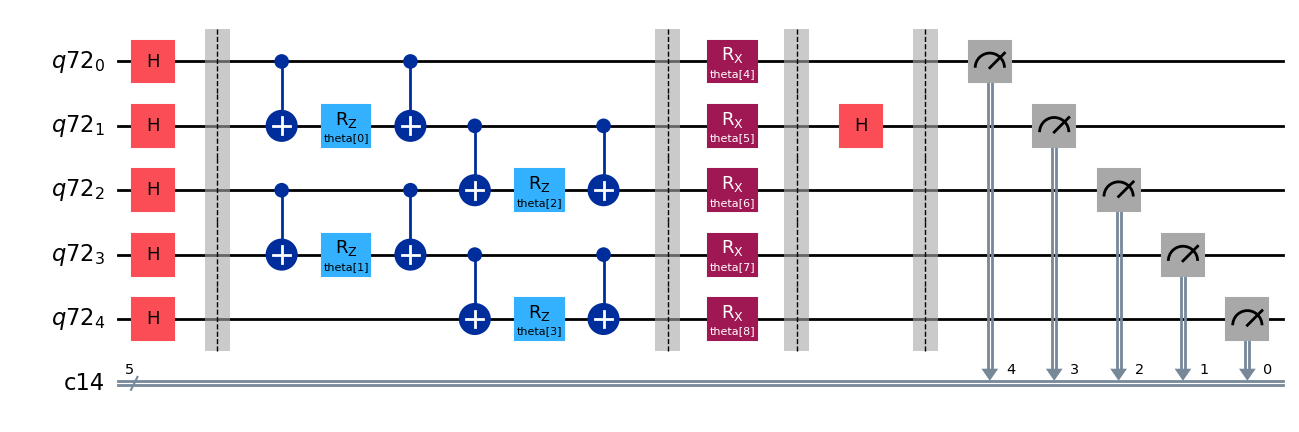

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.cx(0, 1)
ansatz_x1.cx(2, 3)
ansatz_x1.rz(next(it), 1)
ansatz_x1.rz(next(it), 3)
ansatz_x1.cx(0, 1)
ansatz_x1.cx(2, 3)
ansatz_x1.cx(1, 2)
ansatz_x1.cx(3, 4)
ansatz_x1.rz(next(it), 2)
ansatz_x1.rz(next(it), 4)
ansatz_x1.cx(1, 2)
ansatz_x1.cx(3, 4)

ansatz_x1.barrier()

ansatz_x1.rx(next(it), 0)
ansatz_x1.rx(next(it), 1)
ansatz_x1.rx(next(it), 2)
ansatz_x1.rx(next(it), 3)
ansatz_x1.rx(next(it), 4)

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

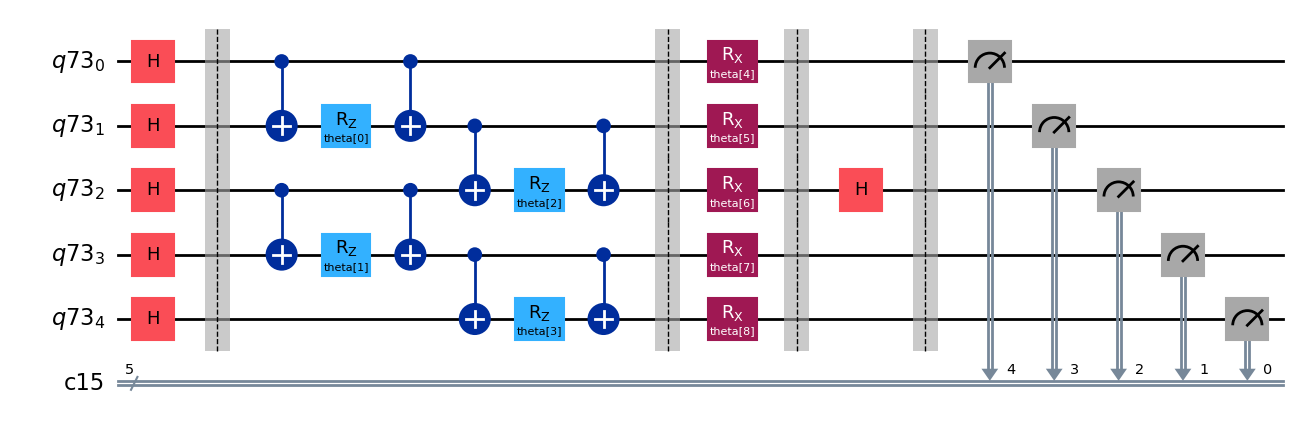

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.cx(0, 1)
ansatz_x2.cx(2, 3)
ansatz_x2.rz(next(it), 1)
ansatz_x2.rz(next(it), 3)
ansatz_x2.cx(0, 1)
ansatz_x2.cx(2, 3)
ansatz_x2.cx(1, 2)
ansatz_x2.cx(3, 4)
ansatz_x2.rz(next(it), 2)
ansatz_x2.rz(next(it), 4)
ansatz_x2.cx(1, 2)
ansatz_x2.cx(3, 4)

ansatz_x2.barrier()

ansatz_x2.rx(next(it), 0)
ansatz_x2.rx(next(it), 1)
ansatz_x2.rx(next(it), 2)
ansatz_x2.rx(next(it), 3)
ansatz_x2.rx(next(it), 4)

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

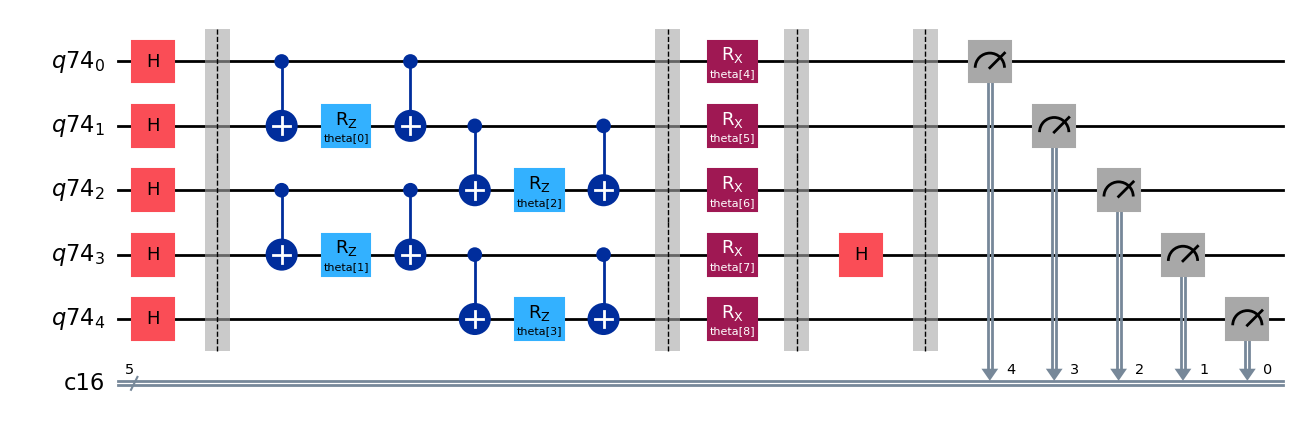

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.cx(0, 1)
ansatz_x3.cx(2, 3)
ansatz_x3.rz(next(it), 1)
ansatz_x3.rz(next(it), 3)
ansatz_x3.cx(0, 1)
ansatz_x3.cx(2, 3)
ansatz_x3.cx(1, 2)
ansatz_x3.cx(3, 4)
ansatz_x3.rz(next(it), 2)
ansatz_x3.rz(next(it), 4)
ansatz_x3.cx(1, 2)
ansatz_x3.cx(3, 4)

ansatz_x3.barrier()

ansatz_x3.rx(next(it), 0)
ansatz_x3.rx(next(it), 1)
ansatz_x3.rx(next(it), 2)
ansatz_x3.rx(next(it), 3)
ansatz_x3.rx(next(it), 4)

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

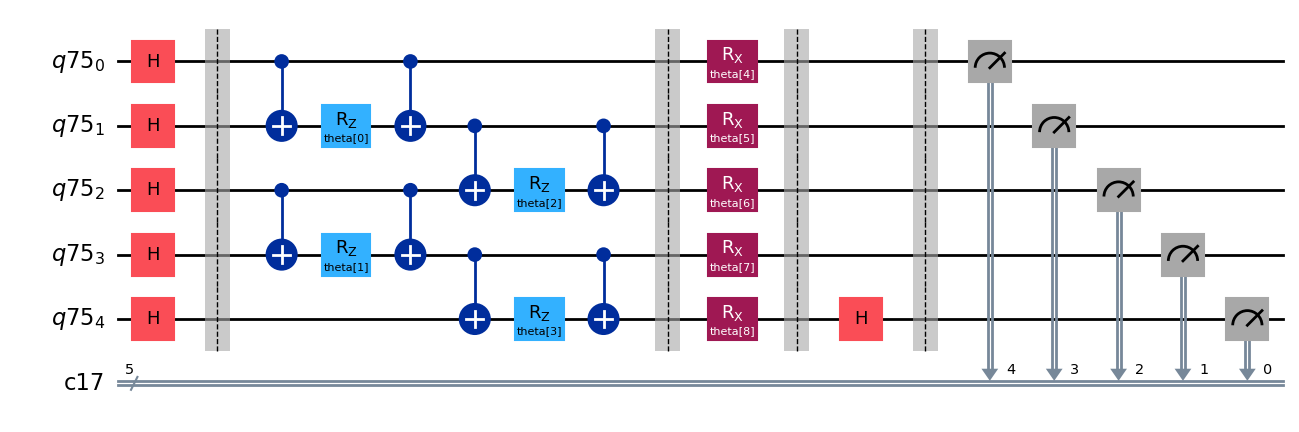

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.cx(0, 1)
ansatz_x4.cx(2, 3)
ansatz_x4.rz(next(it), 1)
ansatz_x4.rz(next(it), 3)
ansatz_x4.cx(0, 1)
ansatz_x4.cx(2, 3)
ansatz_x4.cx(1, 2)
ansatz_x4.cx(3, 4)
ansatz_x4.rz(next(it), 2)
ansatz_x4.rz(next(it), 4)
ansatz_x4.cx(1, 2)
ansatz_x4.cx(3, 4)

ansatz_x4.barrier()

ansatz_x4.rx(next(it), 0)
ansatz_x4.rx(next(it), 1)
ansatz_x4.rx(next(it), 2)
ansatz_x4.rx(next(it), 3)
ansatz_x4.rx(next(it), 4)

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_cusco")
print(backend)

<IBMBackend('ibm_cusco')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circuit_zz = pm.run(ansatz_zz)
isa_circuit_x0 = pm.run(ansatz_x0)
isa_circuit_x1 = pm.run(ansatz_x1)
isa_circuit_x2 = pm.run(ansatz_x2)
isa_circuit_x3 = pm.run(ansatz_x3)
isa_circuit_x4 = pm.run(ansatz_x4)


options = Options()
options.optimization_level = 3
options.resilience_level = 0

sampler = Sampler(backend=backend, options=options)

## Cost Function for VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:50]
  W2 = parameter[50:250]
  W3 = parameter[250:270]
  c = parameter[270]

  W1 = W1.reshape(10,5)
  W2 = W2.reshape(20,10)
  W3 = W3.reshape(1,20)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  z2 = relu(a2)

  a3 = np.matmul(W3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [ ]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 10 times

np.random.seed(k)

k 0~10

In [ ]:
prob_string_zz = {}
prob_string_x0 = {}
prob_string_x1 = {}
prob_string_x2 = {}
prob_string_x3 = {}
prob_string_x4 = {}

local_minimum_list = []

for k in range(20):

  @cache
  def prob(k):
    prob = []

    np.random.seed(seed_list[k])
    params_pqc = 2 * np.pi* np.random.random(9)

    job = sampler.run(isa_circuit_zz, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    job = sampler.run(isa_circuit_x0, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    job = sampler.run(isa_circuit_x1, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    job = sampler.run(isa_circuit_x2, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    job = sampler.run(isa_circuit_x3, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    job = sampler.run(isa_circuit_x4, params_pqc, shots=8000).result()
    prob_string = job.quasi_dists[0]

    for i in range(32):
      if not (i in prob_string):  prob_string[i] = 0

    prob.append(prob_string)


    return prob


  prob_string_zz = prob(k)[0]
  prob_string_x0 = prob(k)[1]
  prob_string_x1 = prob(k)[2]
  prob_string_x2 = prob(k)[3]
  prob_string_x3 = prob(k)[4]
  prob_string_x4 = prob(k)[5]

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

[-3.9999963099191476,
 -15.900735238633969,
 -7.688020398047018,
 -4.231126885772202,
 -0.9608100275147745,
 -4.632841331119896,
 -1.9216387107471185,
 -2.2126726170471107,
 -0.12673317284013796,
 -1.2759043794468583]